# Term Project Final Presentation_Team9

**잎 사진을 통한 질병 분류**

*   데이터: 33개의 클래스로 구분된 약 40000장의 이미지
><img src="https://drive.google.com/uc?id=1YQkxnNy61Gyi3Gp6ylCKeS72BVruJXr_" width="700" height="500"> 
*   데이터 전처리
    *   전체 데이터를 6:2:2의 비율로 train,validation,test로 나눔
    *   augmentation을 통한 클래스 별 불균형 해소
    
*   학습 진행 방향
    *   Baseline 모델(pre-trained model 사용X) 구축
    *   Pre-trained 모델 사용: DenseNet121, Resnet50
    1.   Baseline 모델 비교: split된 원본 데이터 사용, augmentation된 데이터 사용
    2.   Pre-trained 모델 비교: augmentation 된 데이터 사용 (Baseline,DenseNet121,ResNet50 성능 비교)

## **데이터 전처리**

### Split raw data → 6:2:2

In [ ]:
import os, shutil

# 원본 데이터 경로
original_dataset_dir = '/content/gdrive/My Drive/Plant_leave_diseases_dataset_without_augmentation'

# 클래스 list
classes_list = os.listdir(original_dataset_dir)

# split한 데이터를 저장할 디렉토리 지정 후 생성
base_dir = '/content/gdrive/My Drive/dataset_split_raw'
os.mkdir(base_dir)

# train/validation/test 하위 폴더 생성
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


for cls in classes_list:
    # train 하위 폴더로 클래스 별 폴더 생성
    os.mkdir(os.path.join(train_dir, cls))
    
    # validation 하위 폴더로 클래스 별 폴더 생성
    os.mkdir(os.path.join(validation_dir, cls))
    
    # test 하위 폴더로 클래스 별 폴더 생성
    os.mkdir(os.path.join(test_dir, cls))

In [ ]:
import math

for cls in classes_list:
    path = os.path.join(original_dataset_dir, cls)
    fnames = os.listdir(path)
    # 데이터 나눌 비율 지정 (6:2:2)
    train_size = math.floor(len(fnames) * 0.6)
    validation_size = math.floor(len(fnames) * 0.2)
    test_size = math.floor(len(fnames) * 0.2)
    
    train_fnames = fnames[:train_size]
    print("Train size(",cls,"): ", len(train_fnames))
    for fname in train_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(train_dir, cls), fname)
        shutil.copyfile(src, dst)
        
    validation_fnames = fnames[train_size:(validation_size + train_size)]
    print("Validation size(",cls,"): ", len(validation_fnames))
    for fname in validation_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(validation_dir, cls), fname)
        shutil.copyfile(src, dst)
        
    test_fnames = fnames[(train_size+validation_size):(validation_size + train_size +test_size)]
    print("Test size(",cls,"): ", len(test_fnames))
    for fname in test_fnames:
        src = os.path.join(path, fname)
        dst = os.path.join(os.path.join(test_dir, cls), fname)
        shutil.copyfile(src, dst)

random split 진행 후 데이터 수

><img src="https://drive.google.com/uc?id=1e4huPE5W5WCSYSf7P2XDRtyscT1ocOYH" width="400" height="500">

클래스 별 이미지 개수 차이가 크다는 것을 알 수 있다. 데이터 수가 900개 미만인 클래스에 augmentation을 이용하여 오버샘플링을 진행하였다.

### augmentation 수행

In [ ]:
# gdrive에 mount
from google.colab import drive
drive.mount('/content/gdrive')
# 경로 설정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_raw')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np

In [ ]:
# Potato___healthy 152개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Potato___healthy/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Potato___healthy/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Potato___healthy', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>0:
      break

In [ ]:
# Apple___Cedar_apple_rust 275개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Cedar_apple_rust/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Cedar_apple_rust/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Apple___Cedar_apple_rust', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>0:
      break

In [ ]:
# Peach___healthy 360개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Peach___healthy/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Peach___healthy/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Peach___healthy', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>2:
      break

In [ ]:
# Tomato___Tomato_mosaic_virus 373개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Tomato___Tomato_mosaic_virus/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Tomato___Tomato_mosaic_virus/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Tomato___Tomato_mosaic_virus', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>2:
      break

In [ ]:
# Grape___healthy 423개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Grape___healthy/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Grape___healthy/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Grape___healthy', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>2:
      break

In [ ]:
# Strawberry___healthy 456개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Strawberry___healthy/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Strawberry___healthy/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Strawberry___healthy', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>2:
      break

In [ ]:
# Corn___Cercospora_leaf_spot Gray_leaf_spot 513개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Corn___Cercospora_leaf_spot Gray_leaf_spot/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Corn___Cercospora_leaf_spot Gray_leaf_spot/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Corn___Cercospora_leaf_spot Gray_leaf_spot', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>1:
      break

In [ ]:
# Apple___Black_rot 621개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Black_rot/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Black_rot/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Apple___Black_rot', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>1:
      break

In [ ]:
# Apple___Apple_scab 630개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Apple_scab/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Apple___Apple_scab/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Apple___Apple_scab', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>0:
      break

In [ ]:
# Cherry___healthy 854개
images = os.listdir('/content/gdrive/My Drive/dataset_split_raw/train/Cherry___healthy/')

for image in images:
  image = load_img('/content/gdrive/My Drive/dataset_split_raw/train/Cherry___healthy/'+image)
  input_arr = img_to_array(image)
  input_arr = np.array([input_arr])  # Convert single image to a batch.

  i = 0
  for batch in train_datagen.flow (input_arr, batch_size=1, save_to_dir ='/content/gdrive/My Drive/dataset_split_raw/train/Cherry___healthy', save_prefix ='aug', save_format='jpg'):
    i+=1
    if i>0:
      break

augmentation 진행 후 데이터 수

><img src="https://drive.google.com/uc?id=1fTuJIHthvoscIKs5u03HgtbuGhBpjngU" width="400" height="500">

## **Baseline model**

두 가지 모델 구축
* baseline1: conv, maxpooling, dropout 이용하여 구축
* baseline2: baseline1에서 dropout 삭제하고 3개의 레이어 추가하여 구축

### 1. Baseline with augmented data

In [ ]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, Activation, Dropout, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dst_path = '/content/gdrive/My Drive/dataset_split_aug'
# 경로 지정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_aug')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 전체 train 데이터에 이미지 노이즈 주기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')
test_dir = os.path.join(dst_path, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(64,64),
                                                        batch_size=64,
                                                        class_mode='categorical')

Found 30748 images belonging to 33 classes.
Found 7989 images belonging to 33 classes.


* baseline1

In [ ]:
# baseline1 모델 구조 정의 
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(64,64,3), padding='same', activation= 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same', activation= 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# 전결합층
model1.add(Flatten())    # 벡터형태로 reshape
model1.add(Dense(512))   # 출력
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(33))
model1.add(Activation('softmax'))

# 모델 구축하기
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0) # 최적화 함수 지정

model1.compile(loss='categorical_crossentropy',   
    optimizer=optimizer,
    metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/base_aug_1/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)

my_callbacks = [checkpoint,annealer]

In [ ]:
baseline1= model1.fit_generator(train_generator,
                                epochs=50,
                                validation_data=validation_generator,
                                callbacks=my_callbacks)

Epoch 1/50
481/481 [==============================] - 4647s 10s/step - loss: 3.4098 - accuracy: 0.1046 - val_loss: 3.2838 - val_accuracy: 0.1341

Epoch 00001: val_accuracy improved from -inf to 0.13406, saving model to /content/gdrive/My Drive/model_save/base_aug_1/01-3.2838.hdf5
Epoch 2/50
481/481 [==============================] - 113s 234ms/step - loss: 3.2616 - accuracy: 0.1243 - val_loss: 3.1372 - val_accuracy: 0.1717

Epoch 00002: val_accuracy improved from 0.13406 to 0.17174, saving model to /content/gdrive/My Drive/model_save/base_aug_1/02-3.1372.hdf5
Epoch 3/50
481/481 [==============================] - 110s 228ms/step - loss: 2.8926 - accuracy: 0.2013 - val_loss: 2.5921 - val_accuracy: 0.2904

Epoch 00003: val_accuracy improved from 0.17174 to 0.29040, saving model to /content/gdrive/My Drive/model_save/base_aug_1/03-2.5921.hdf5
Epoch 4/50
481/481 [==============================] - 111s 231ms/step - loss: 2.5553 - accuracy: 0.2828 - val_loss: 2.3173 - val_accuracy: 0.3944

Ep

In [ ]:
model1.save('/content/gdrive/My Drive/model_save/base_aug_1/baseline1_aug.h5')

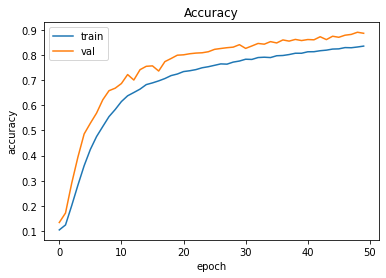

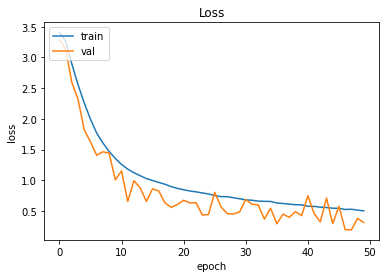

In [ ]:
# accuracy plot 
plt.plot(baseline1.history['accuracy'])
plt.plot(baseline1.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(baseline1.history['loss'])
plt.plot(baseline1.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

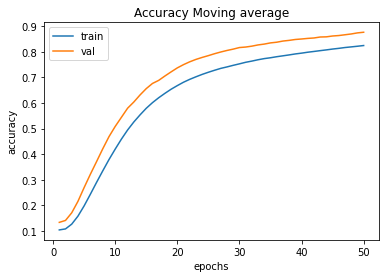

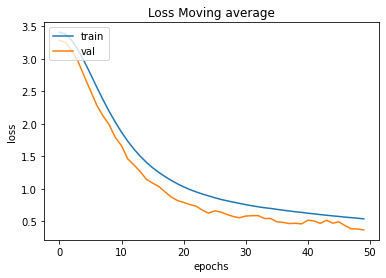

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(baseline1.history['accuracy'])
smooth_mae_history_val = smooth_curve(baseline1.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(baseline1.history['loss']))
plt.plot(smooth_curve(baseline1.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

*   baseline2

In [ ]:
# baseline2 모델 구조 정의 
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(64,64,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), padding = 'same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# 전결합층
model2.add(Flatten())    # 벡터형태로 reshape
model2.add(Dense(512))   # 출력
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(33))
model2.add(Activation('softmax'))

# 모델 구축하기
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0) # 최적화 함수 지정

model2.compile(loss='categorical_crossentropy',   
    optimizer=optimizer,
    metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/base_aug_2/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)

my_callbacks = [checkpoint,annealer]

In [ ]:
baseline2= model2.fit_generator(train_generator,
                                epochs=50,
                                validation_data=validation_generator,
                                callbacks=my_callbacks)

Epoch 1/50
481/481 [==============================] - 114s 236ms/step - loss: 3.4801 - accuracy: 0.0683 - val_loss: 3.4722 - val_accuracy: 0.1341

Epoch 00001: val_accuracy improved from -inf to 0.13406, saving model to /content/gdrive/My Drive/model_save/base_aug_2/01-3.4722.hdf5
Epoch 2/50
481/481 [==============================] - 111s 231ms/step - loss: 3.4348 - accuracy: 0.1042 - val_loss: 3.4338 - val_accuracy: 0.1341

Epoch 00002: val_accuracy did not improve from 0.13406
Epoch 3/50
481/481 [==============================] - 111s 231ms/step - loss: 3.4189 - accuracy: 0.1045 - val_loss: 3.4402 - val_accuracy: 0.1341

Epoch 00003: val_accuracy did not improve from 0.13406
Epoch 4/50
481/481 [==============================] - 110s 228ms/step - loss: 3.3839 - accuracy: 0.1045 - val_loss: 3.3281 - val_accuracy: 0.1341

Epoch 00004: val_accuracy did not improve from 0.13406
Epoch 5/50
481/481 [==============================] - 110s 228ms/step - loss: 3.2948 - accuracy: 0.1085 - val_lo

In [ ]:
model2.save('/content/gdrive/My Drive/model_save/base_aug_2/baseline2_aug.h5')

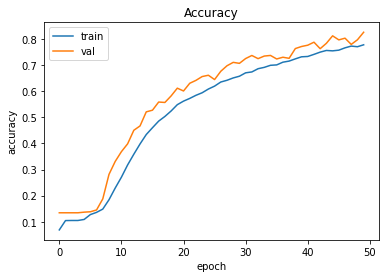

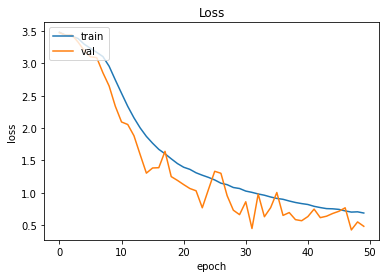

In [ ]:
# accuracy plot 
plt.plot(baseline2.history['accuracy'])
plt.plot(baseline2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(baseline2.history['loss'])
plt.plot(baseline2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

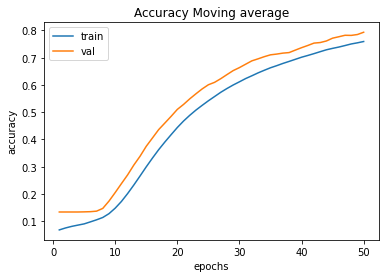

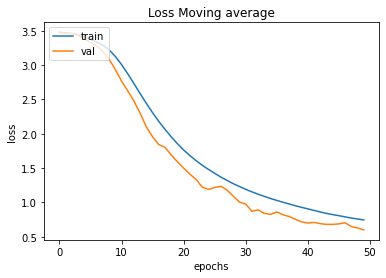

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(baseline2.history['accuracy'])
smooth_mae_history_val = smooth_curve(baseline2.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(baseline2.history['loss']))
plt.plot(smooth_curve(baseline2.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 2. Baseline with splited raw data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dst_path = '/content/gdrive/My Drive/dataset_split_raw_withoutaug'
# 경로 지정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_raw_withoutaug')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# 전체 train 데이터에 이미지 노이즈 주기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')
test_dir = os.path.join(dst_path, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(64,64),
                                                        batch_size=64,
                                                        class_mode='categorical')

Found 23989 images belonging to 33 classes.
Found 7989 images belonging to 33 classes.


* baseline1

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/base_raw_1/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)

my_callbacks = [checkpoint,annealer]

In [ ]:
baseline1= model1.fit_generator(train_generator,
                                epochs=50,
                                validation_data=validation_generator,
                                callbacks=my_callbacks)

Epoch 1/50
374/375 [============================>.] - ETA: 5s - loss: 3.3312 - accuracy: 0.1332 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


375/375 [==============================] - 3231s 9s/step - loss: 3.3310 - accuracy: 0.1334 - val_loss: 3.3150 - val_accuracy: 0.1341

Epoch 00001: val_accuracy improved from -inf to 0.13406, saving model to /content/gdrive/My Drive/model_save/base_raw_1/01-3.3150.hdf5
Epoch 2/50
375/375 [==============================] - 81s 217ms/step - loss: 3.2701 - accuracy: 0.1358 - val_loss: 3.1923 - val_accuracy: 0.1344

Epoch 00002: val_accuracy improved from 0.13406 to 0.13443, saving model to /content/gdrive/My Drive/model_save/base_raw_1/02-3.1923.hdf5
Epoch 3/50
375/375 [==============================] - 83s 221ms/step - loss: 3.0647 - accuracy: 0.1795 - val_loss: 2.7301 - val_accuracy: 0.2365

Epoch 00003: val_accuracy improved from 0.13443 to 0.23645, saving model to /content/gdrive/My Drive/model_save/base_raw_1/03-2.7301.hdf5
Epoch 4/50
375/375 [==============================] - 82s 218ms/step - loss: 2.7523 - accuracy: 0.2480 - val_loss: 2.5674 - val_accuracy: 0.3248

Epoch 00004: val_

In [ ]:
model1.save('/content/gdrive/My Drive/model_save/base_raw_1/baseline1_raw.h5')

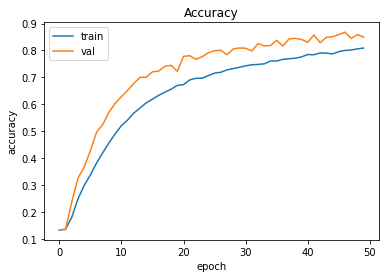

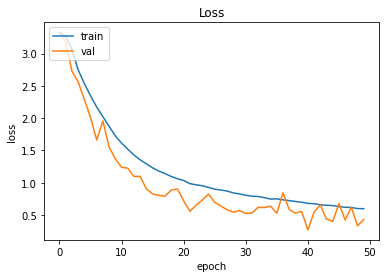

In [ ]:
# accuracy plot 
plt.plot(baseline1.history['accuracy'])
plt.plot(baseline1.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(baseline1.history['loss'])
plt.plot(baseline1.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

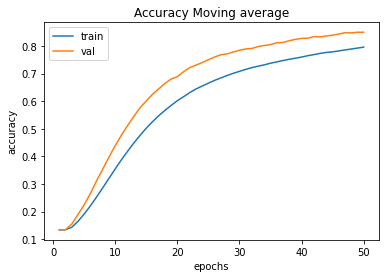

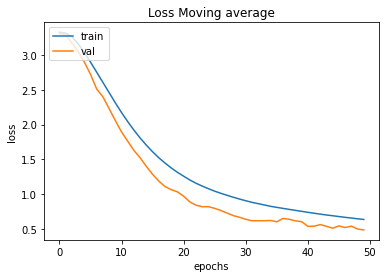

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(baseline1.history['accuracy'])
smooth_mae_history_val = smooth_curve(baseline1.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(baseline1.history['loss']))
plt.plot(smooth_curve(baseline1.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

*   baseline2

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/base_raw_2/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)

my_callbacks = [checkpoint,annealer]

In [ ]:
baseline2= model2.fit_generator(train_generator,
                                epochs=50,
                                validation_data=validation_generator,
                                callbacks=my_callbacks)

Epoch 1/50
375/375 [==============================] - 84s 223ms/step - loss: 3.4458 - accuracy: 0.0869 - val_loss: 3.4069 - val_accuracy: 0.1341

Epoch 00001: val_accuracy improved from -inf to 0.13406, saving model to /content/gdrive/My Drive/model_save/base_raw_2/01-3.4069.hdf5
Epoch 2/50
375/375 [==============================] - 83s 222ms/step - loss: 3.3465 - accuracy: 0.1333 - val_loss: 3.2570 - val_accuracy: 0.1341

Epoch 00002: val_accuracy did not improve from 0.13406
Epoch 3/50
375/375 [==============================] - 81s 217ms/step - loss: 3.3158 - accuracy: 0.1336 - val_loss: 3.4107 - val_accuracy: 0.1341

Epoch 00003: val_accuracy did not improve from 0.13406
Epoch 4/50
375/375 [==============================] - 81s 217ms/step - loss: 3.2480 - accuracy: 0.1339 - val_loss: 3.1550 - val_accuracy: 0.1341

Epoch 00004: val_accuracy did not improve from 0.13406
Epoch 5/50
375/375 [==============================] - 81s 217ms/step - loss: 3.1645 - accuracy: 0.1376 - val_loss: 3

In [ ]:
model2.save('/content/gdrive/My Drive/model_save/base_raw_2/baseline2_raw.h5')

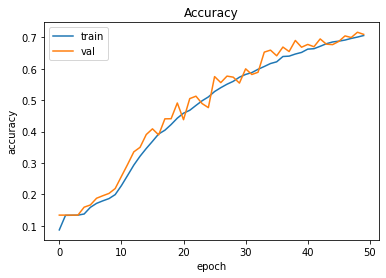

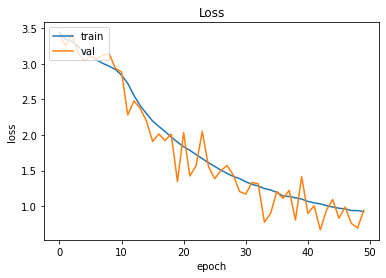

In [ ]:
# accuracy plot 
plt.plot(baseline2.history['accuracy'])
plt.plot(baseline2.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(baseline2.history['loss'])
plt.plot(baseline2.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

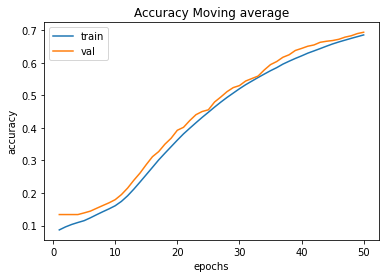

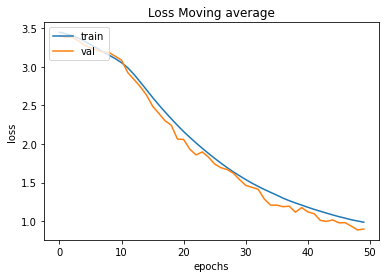

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(baseline2.history['accuracy'])
smooth_mae_history_val = smooth_curve(baseline2.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(baseline2.history['loss']))
plt.plot(smooth_curve(baseline2.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

##**Pre-trained model 사용**

### DenseNet121

*   전체 레이어 학습하도록 모델 구성--DenseNet
*   밑에서 부터 첫 Average Pooling layer이전 까지만 학습하도록 모델 구성--DenseNet Freeze
><img src="https://drive.google.com/uc?id=11_GIyN0phrSX3DVhLzbUXK9XS_a1tgVT" width="500" height="500"> 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dst_path = '/content/gdrive/My Drive/dataset_split_aug'
# 경로 지정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_aug')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 전체 train 데이터에 이미지 노이즈 주기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')
test_dir = os.path.join(dst_path, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(64,64),
                                                        batch_size=64,
                                                        class_mode='categorical')

Found 30748 images belonging to 33 classes.
Found 7989 images belonging to 33 classes.


DenseNet 모델 구성

* input layer → conv layer → DenseNet 후 global average pooling, batch normalization, dropout 활용

In [ ]:
SIZE=64
N_ch=3

In [ ]:
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(33,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = build_densenet()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 3)         84        
_________________________________________________________________
densenet121 (Model)          multiple                  7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2624

DenseNet 모델 실행

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/dense/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)
earlystop=EarlyStopping(patience=10)

my_callbacks = [earlystop,checkpoint,annealer]

In [ ]:
dense = model.fit_generator(train_generator,
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=my_callbacks)

Epoch 1/50
480/481 [============================>.] - ETA: 17s - loss: 3.1499 - accuracy: 0.2611

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 95 could not be retrieved. It could be because a worker has died.
  UserWarning)


481/481 [==============================] - 10271s 21s/step - loss: 3.1464 - accuracy: 0.2618 - val_loss: 1.6667 - val_accuracy: 0.5570

Epoch 00001: val_accuracy improved from -inf to 0.55702, saving model to /content/gdrive/My Drive/model_save/dense/01-1.6667.hdf5
Epoch 2/50
481/481 [==============================] - 127s 263ms/step - loss: 1.2564 - accuracy: 0.6383 - val_loss: 0.6380 - val_accuracy: 0.7802

Epoch 00002: val_accuracy improved from 0.55702 to 0.78020, saving model to /content/gdrive/My Drive/model_save/dense/02-0.6380.hdf5
Epoch 3/50
481/481 [==============================] - 120s 250ms/step - loss: 0.7660 - accuracy: 0.7707 - val_loss: 0.6235 - val_accuracy: 0.8025

Epoch 00003: val_accuracy improved from 0.78020 to 0.80248, saving model to /content/gdrive/My Drive/model_save/dense/03-0.6235.hdf5
Epoch 4/50
481/481 [==============================] - 120s 249ms/step - loss: 0.5597 - accuracy: 0.8282 - val_loss: 0.3235 - val_accuracy: 0.8477

Epoch 00004: val_accuracy i

In [ ]:
model.save('/content/gdrive/My Drive/model_save/dense/DenseNet.h5')

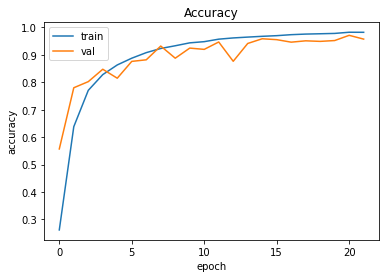

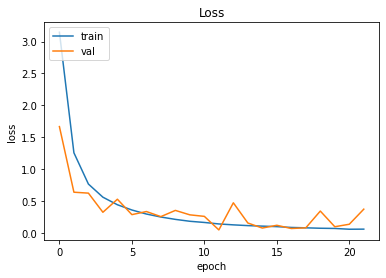

In [ ]:
# accuracy plot 
plt.plot(dense.history['accuracy'])
plt.plot(dense.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(dense.history['loss'])
plt.plot(dense.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

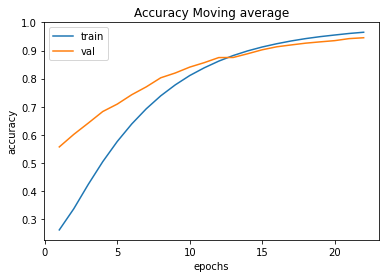

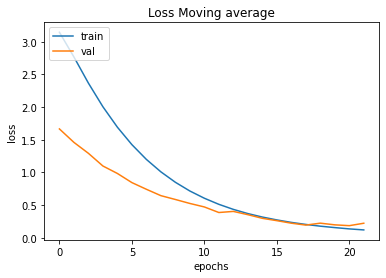

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(dense.history['accuracy'])
smooth_mae_history_val = smooth_curve(dense.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(dense.history['loss']))
plt.plot(smooth_curve(dense.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

DenseNet Freeze 모델 구성

* 밑에서 114번째 레이어까지 학습하도록 조정

In [ ]:
SIZE=64
N_ch=3

In [ ]:
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = densenet(x)
    for layer in densenet.layers[:-114]:
      layer.trainable = False
    for layer in densenet.layers:
      print(layer, layer.trainable)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(33,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [ ]:
model = build_densenet()
model.summary()

29089792/29084464 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f2390bd9b38> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f23d01ba4a8> False
<keras.layers.convolutional.Conv2D object at 0x7f23d01ba3c8> False
<keras.layers.normalization.BatchNormalization object at 0x7f23e55e7080> False
<keras.layers.core.Activation object at 0x7f23e55e72b0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f2391847940> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2391847668> False
<keras.layers.normalization.BatchNormalization object at 0x7f2391847e80> False
<keras.layers.core.Activation object at 0x7f23909b5278> False
<keras.layers.convolutional.Conv2D object at 0x7f23909d0e80> False
<keras.layers.normalization.BatchNormalization object at 0x7f239098ce10> False
<keras.layers.core.Activation object at 0x7f23909919e8> False
<keras.layers.convolutional.Conv2D object at 0x7f23909a6be0> False
<keras.layers.merge.Concate

DenseNet Freeze 모델 실행

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)

MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/model_save/dense_freeze/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)
earlystop=EarlyStopping(patience=10)

my_callbacks = [earlystop,checkpoint,annealer]

In [ ]:
dense = model.fit_generator(train_generator,
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=my_callbacks)

Epoch 1/50
481/481 [==============================] - 10218s 21s/step - loss: 3.4562 - accuracy: 0.1939 - val_loss: 1.8261 - val_accuracy: 0.4540

Epoch 00001: val_accuracy improved from -inf to 0.45400, saving model to /content/gdrive/My Drive/model_save/dense_freeze/01-1.8261.hdf5
Epoch 2/50
481/481 [==============================] - 122s 254ms/step - loss: 2.1080 - accuracy: 0.4256 - val_loss: 1.3258 - val_accuracy: 0.5414

Epoch 00002: val_accuracy improved from 0.45400 to 0.54137, saving model to /content/gdrive/My Drive/model_save/dense_freeze/02-1.3258.hdf5
Epoch 3/50
481/481 [==============================] - 120s 249ms/step - loss: 1.5473 - accuracy: 0.5516 - val_loss: 1.1283 - val_accuracy: 0.6165

Epoch 00003: val_accuracy improved from 0.54137 to 0.61647, saving model to /content/gdrive/My Drive/model_save/dense_freeze/03-1.1283.hdf5
Epoch 4/50
481/481 [==============================] - 120s 250ms/step - loss: 1.2495 - accuracy: 0.6279 - val_loss: 0.9706 - val_accuracy: 0.6

In [ ]:
model.save('/content/gdrive/My Drive/model_save/dense_freeze/DenseNet_freeze.h5')

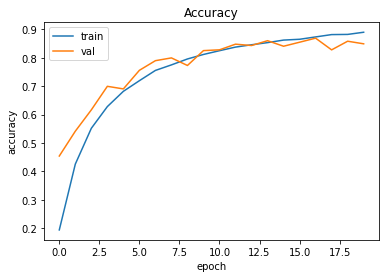

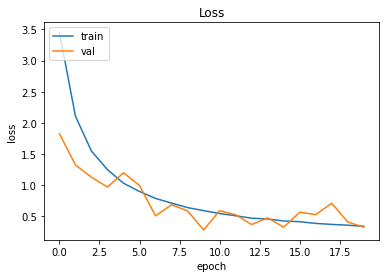

In [ ]:
# accuracy plot 
plt.plot(dense.history['accuracy'])
plt.plot(dense.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# loss plot
plt.plot(dense.history['loss'])
plt.plot(dense.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

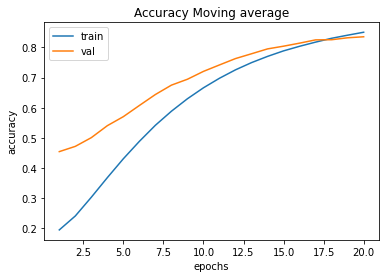

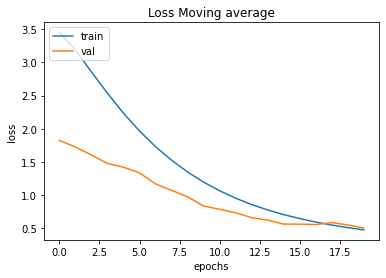

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(dense.history['accuracy'])
smooth_mae_history_val = smooth_curve(dense.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(smooth_curve(dense.history['loss']))
plt.plot(smooth_curve(dense.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Resnet50

*   전체 레이어 학습하도록 모델 구성

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')
test_dir = os.path.join(dst_path, 'test')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(64,64),
                                                    batch_size=64,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(64,64),
                                                        batch_size=64,
                                                        class_mode='categorical')

Found 30748 images belonging to 33 classes.
Found 7989 images belonging to 33 classes.


In [ ]:
SIZE=64
N_ch=3

In [ ]:
input_tensor = Input(shape=(SIZE, SIZE, N_ch))
conv_base = ResNet50(include_top=False, weights='imagenet',input_tensor=input_tensor,pooling='max')
conv_base.trainable = True

94658560/94653016 [==============================] - 2s 0us/step


In [ ]:
for layer in conv_base.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fbd0029ed68> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fbd0029ee48> True
<keras.layers.convolutional.Conv2D object at 0x7fbcfdb06b38> True
<keras.layers.normalization.BatchNormalization object at 0x7fbd00253128> True
<keras.layers.core.Activation object at 0x7fbd00253240> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7fbd62cb7a58> True
<keras.layers.pooling.MaxPooling2D object at 0x7fbcebe37f28> True
<keras.layers.convolutional.Conv2D object at 0x7fbcebbd6f60> True
<keras.layers.normalization.BatchNormalization object at 0x7fbcebc004e0> True
<keras.layers.core.Activation object at 0x7fbce006ecc0> True
<keras.layers.convolutional.Conv2D object at 0x7fbc9017b3c8> True
<keras.layers.normalization.BatchNormalization object at 0x7fbc9018ec50> True
<keras.layers.core.Activation object at 0x7fbc9018e668> True
<keras.layers.convolutional.Conv2D object at 0x7fbc901abc50> True
<keras.layers.convolutional.Conv2D obj

In [ ]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

ResNet Model에 Dense layer쌓아 모델 구성

In [ ]:
x = conv_base.output
output = layers.Dense(33, activation='softmax')(x)
model = Model(input_tensor, output)

model.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(),metrics=['accuracy'])

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-5)
MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}_halfFreeze2_lrEdit.hdf5'
checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_accuracy',verbose=1, save_best_only=True)
earlystop=EarlyStopping(patience=15)
my_callbacks = [checkpoint, annealer]

디버깅 experience: ReduceLROnPlateau lr이 Adam의 lr과 동일한 경우 - Plateau를 벗어나지 못함

In [ ]:
# Fits the model on batches with real-time data augmentation
resnet = model.fit_generator(train_generator, steps_per_epoch=500,
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=my_callbacks)

Epoch 1/50
500/500 [==============================] - 166s 332ms/step - loss: 0.0670 - accuracy: 0.9775 - val_loss: 1.7840 - val_accuracy: 0.6460
Epoch 2/50
  1/500 [..............................] - ETA: 1:07 - loss: 0.0492 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


500/500 [==============================] - 161s 323ms/step - loss: 0.0594 - accuracy: 0.9807 - val_loss: 3.3717 - val_accuracy: 0.5754
Epoch 3/50
500/500 [==============================] - 163s 327ms/step - loss: 0.0580 - accuracy: 0.9809 - val_loss: 0.5610 - val_accuracy: 0.8723
Epoch 4/50
500/500 [==============================] - 160s 321ms/step - loss: 0.0547 - accuracy: 0.9810 - val_loss: 0.4382 - val_accuracy: 0.9249
Epoch 5/50
500/500 [==============================] - 162s 324ms/step - loss: 0.0712 - accuracy: 0.9777 - val_loss: 0.3500 - val_accuracy: 0.8775
Epoch 6/50
500/500 [==============================] - 160s 320ms/step - loss: 0.0527 - accuracy: 0.9819 - val_loss: 0.1872 - val_accuracy: 0.8902
Epoch 7/50
500/500 [==============================] - 161s 322ms/step - loss: 0.0505 - accuracy: 0.9824 - val_loss: 0.8408 - val_accuracy: 0.8468
Epoch 8/50
500/500 [==============================] - 163s 326ms/step - loss: 0.0471 - accuracy: 0.9838 - val_loss: 0.6209 - val_accura

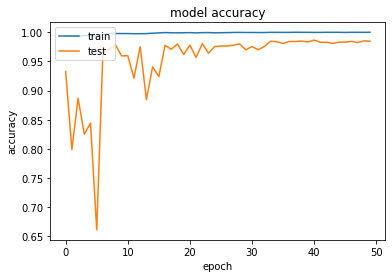

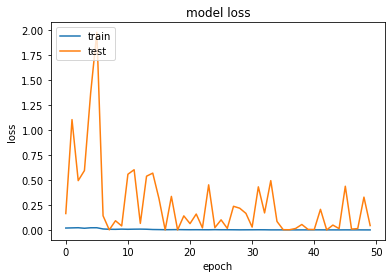

In [ ]:
# accuracy plot 
plt.plot(resnet.history['accuracy'])
plt.plot(resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(resnet.history['loss'])
plt.plot(resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

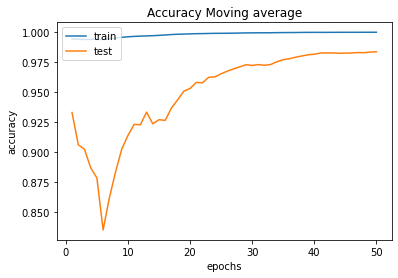

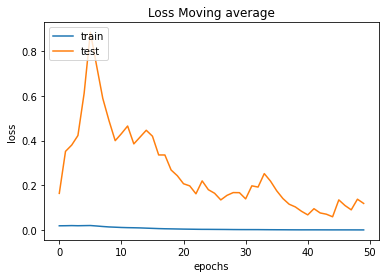

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(resnet.history['accuracy'])
smooth_mae_history_val = smooth_curve(resnet.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(smooth_curve(resnet.history['loss']))
plt.plot(smooth_curve(resnet.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Resnet Best Model (no Freeze) _ lr값 수정

In [ ]:
# Fits the model on batches with real-time data augmentation
resnet = model.fit_generator(train_generator, steps_per_epoch=500,
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=my_callbacks)

Epoch 1/50
500/500 [==============================] - 7896s 16s/step - loss: 1.0850 - accuracy: 0.7392 - val_loss: 10.5468 - val_accuracy: 0.0214

Epoch 00001: val_accuracy improved from -inf to 0.02140, saving model to /content/gdrive/My Drive/01-10.5468_halfFreeze.hdf5
Epoch 2/50
500/500 [==============================] - 126s 251ms/step - loss: 1.0096 - accuracy: 0.7693 - val_loss: 143.4207 - val_accuracy: 0.0907

Epoch 00002: val_accuracy improved from 0.02140 to 0.09075, saving model to /content/gdrive/My Drive/02-143.4207_halfFreeze.hdf5
Epoch 3/50
500/500 [==============================] - 122s 245ms/step - loss: 0.8019 - accuracy: 0.8033 - val_loss: 1.1519 - val_accuracy: 0.7364

Epoch 00003: val_accuracy improved from 0.09075 to 0.73639, saving model to /content/gdrive/My Drive/03-1.1519_halfFreeze.hdf5
Epoch 4/50
500/500 [==============================] - 123s 246ms/step - loss: 0.4988 - accuracy: 0.8680 - val_loss: 0.5826 - val_accuracy: 0.8408

Epoch 00004: val_accuracy imp

In [ ]:
from keras.models import load_model
model.save('plant_resnet_halfTrain_reducePleateaulr.h5')

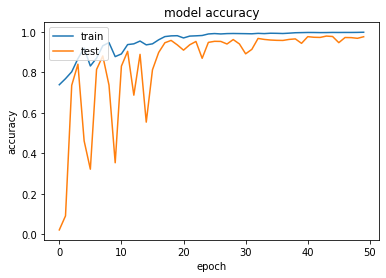

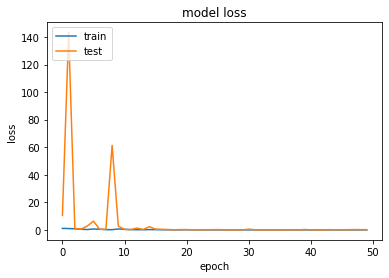

In [ ]:
# accuracy plot 
plt.plot(resnet.history['accuracy'])
plt.plot(resnet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(resnet.history['loss'])
plt.plot(resnet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

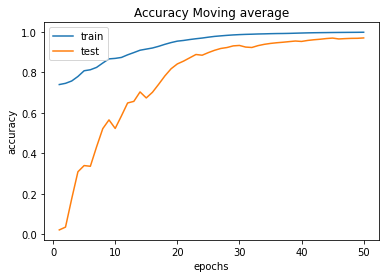

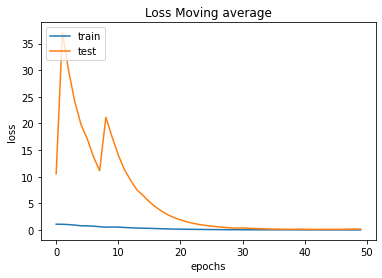

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_train = smooth_curve(resnet.history['accuracy'])
smooth_mae_history_val = smooth_curve(resnet.history['val_accuracy'])
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train)
plt.plot(range(1, len(smooth_mae_history_val) + 1), smooth_mae_history_val)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy Moving average')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(smooth_curve(resnet.history['loss']))
plt.plot(smooth_curve(resnet.history['val_loss']))
plt.title('Loss Moving average')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **성능 평가**

###Test Data 전처리


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dst_path = '/content/gdrive/My Drive/dataset_split_aug' #test데이터 들어있는 폴더
# 경로 지정
import os
os.chdir('/content/gdrive/My Drive/dataset_split_aug')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
test_dir = os.path.join(dst_path, 'test') # test data 폴더 경로지정

In [ ]:
# test data 정규화
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(64, 64),
        shuffle = False,
        class_mode='categorical',
        batch_size=64)

Found 7989 images belonging to 33 classes.


###Train Data (Augmentated vs. Raw)의 개수 시각화

In [ ]:
dst_path1 = '/content/gdrive/My Drive/dataset_split_aug'
dst_path2 = '/content/gdrive/My Drive/dataset_split_raw_withoutaug'

train_dir1 = os.path.join(dst_path1, 'train')
train_dir2 = os.path.join(dst_path2, 'train')

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']

train_data1 = []
num1 = []
for defects_id, sp in enumerate(class_names):
    num1.append(len(os.listdir(os.path.join(train_dir1, sp))))
    for file in os.listdir(os.path.join(train_dir1, sp)):
        train_data1.append(['{}/{}'.format(sp, file), defects_id, sp])

train_data2 = []
num2 = []
for defects_id, sp in enumerate(class_names):
    num2.append(len(os.listdir(os.path.join(train_dir2, sp))))
    for file in os.listdir(os.path.join(train_dir2, sp)):
        train_data2.append(['{}/{}'.format(sp, file), defects_id, sp])


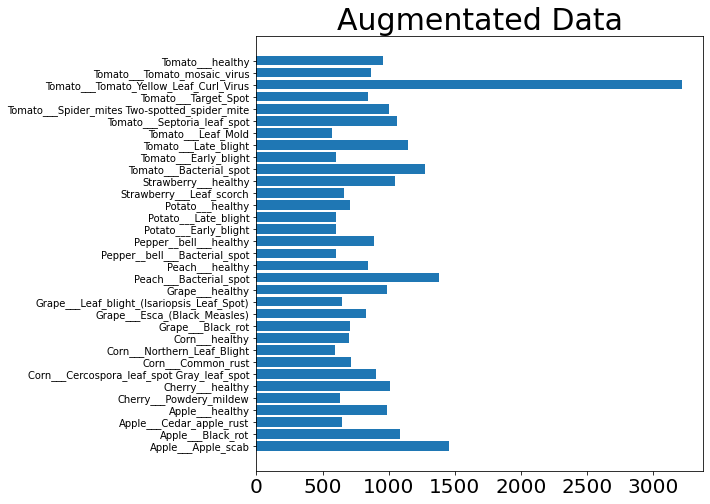

<Figure size 576x576 with 0 Axes>

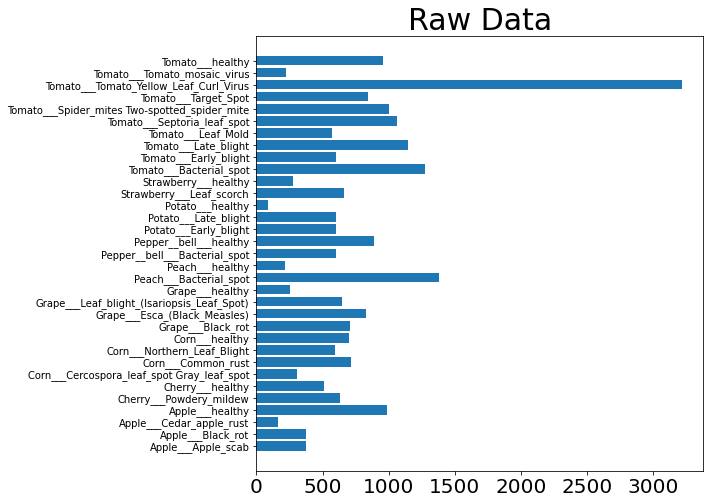

<Figure size 2592x2592 with 0 Axes>

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8,8))
plt.barh(class_names, num1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Augmentated Data',fontsize=30)
plt.figure(figsize=(8, 8))
plt.show()

fig2 = plt.figure(figsize=(8,8))
plt.barh(class_names, num2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.title('Raw Data',fontsize=30)
plt.figure(figsize=(36, 36))
plt.show()

###Prediction

In [ ]:
# augmentation된 데이터로 훈련한 baseline1 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_aug_1)
filepath = 'baseline1_aug.h5'
loaded_model1=load_model(filepath)
predict1 = loaded_model1.predict_generator(test_generator)

In [ ]:
# raw 데이터로 훈련한 baseline1 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_raw_1')
filepath2 = 'baseline1_raw.h5'
loaded_model2=load_model(filepath2)
predict2 = loaded_model2.predict_generator(test_generator)

In [ ]:
# augmentation된 데이터로 훈련한 baseline2 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_aug_2')
filepath3 = 'baseline2_aug.h5'
loaded_model3=load_model(filepath3)
predict3 = loaded_model3.predict_generator(test_generator)

In [ ]:
# raw 데이터로 훈련한 baseline2 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/base_raw_2')
filepath4 = 'baseline2_raw.h5'
loaded_model4=load_model(filepath4)
predict4 = loaded_model4.predict_generator(test_generator)

In [ ]:
# DenseNet 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/dense')
filepath5 = 'DenseNet.h5'
loaded_model5=load_model(filepath5)
predict5 = loaded_model5.predict_generator(test_generator)

In [ ]:
# DenseNet Freeze 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/dense_freeze')
filepath6 = 'DenseNet_freeze.h5'
loaded_model6=load_model(filepath6)
predict6 = loaded_model6.predict_generator(test_generator)

In [ ]:
# ResNet 모델 Prediction

os.chdir('/content/gdrive/My Drive/model_save/resnet')
filepath7 = 'ResNet.hdf5'
loaded_model7=load_model(filepath7)
predict7 = loaded_model7.predict_generator(test_generator)

###Confusion Matrix

-- Recall에 해당하는 행 방향은 input된 class에 대해서, 분류기(Classifier)가 어떤 class로 예측을 하는지에 대한 척도이다.

-- Precision에 해당하는 칼럼 방향은 예측한 값들 중에서 제대로 예측했는지에 대한 척도이다.

><img src="https://drive.google.com/uc?export=view&id=19KzNQB4fAOIVRj4fTuJ9HsavLBFWBjl_">

* Baseline1 with Augmented Data

Text(0.5, 324.5937499999999, 'Predicted')

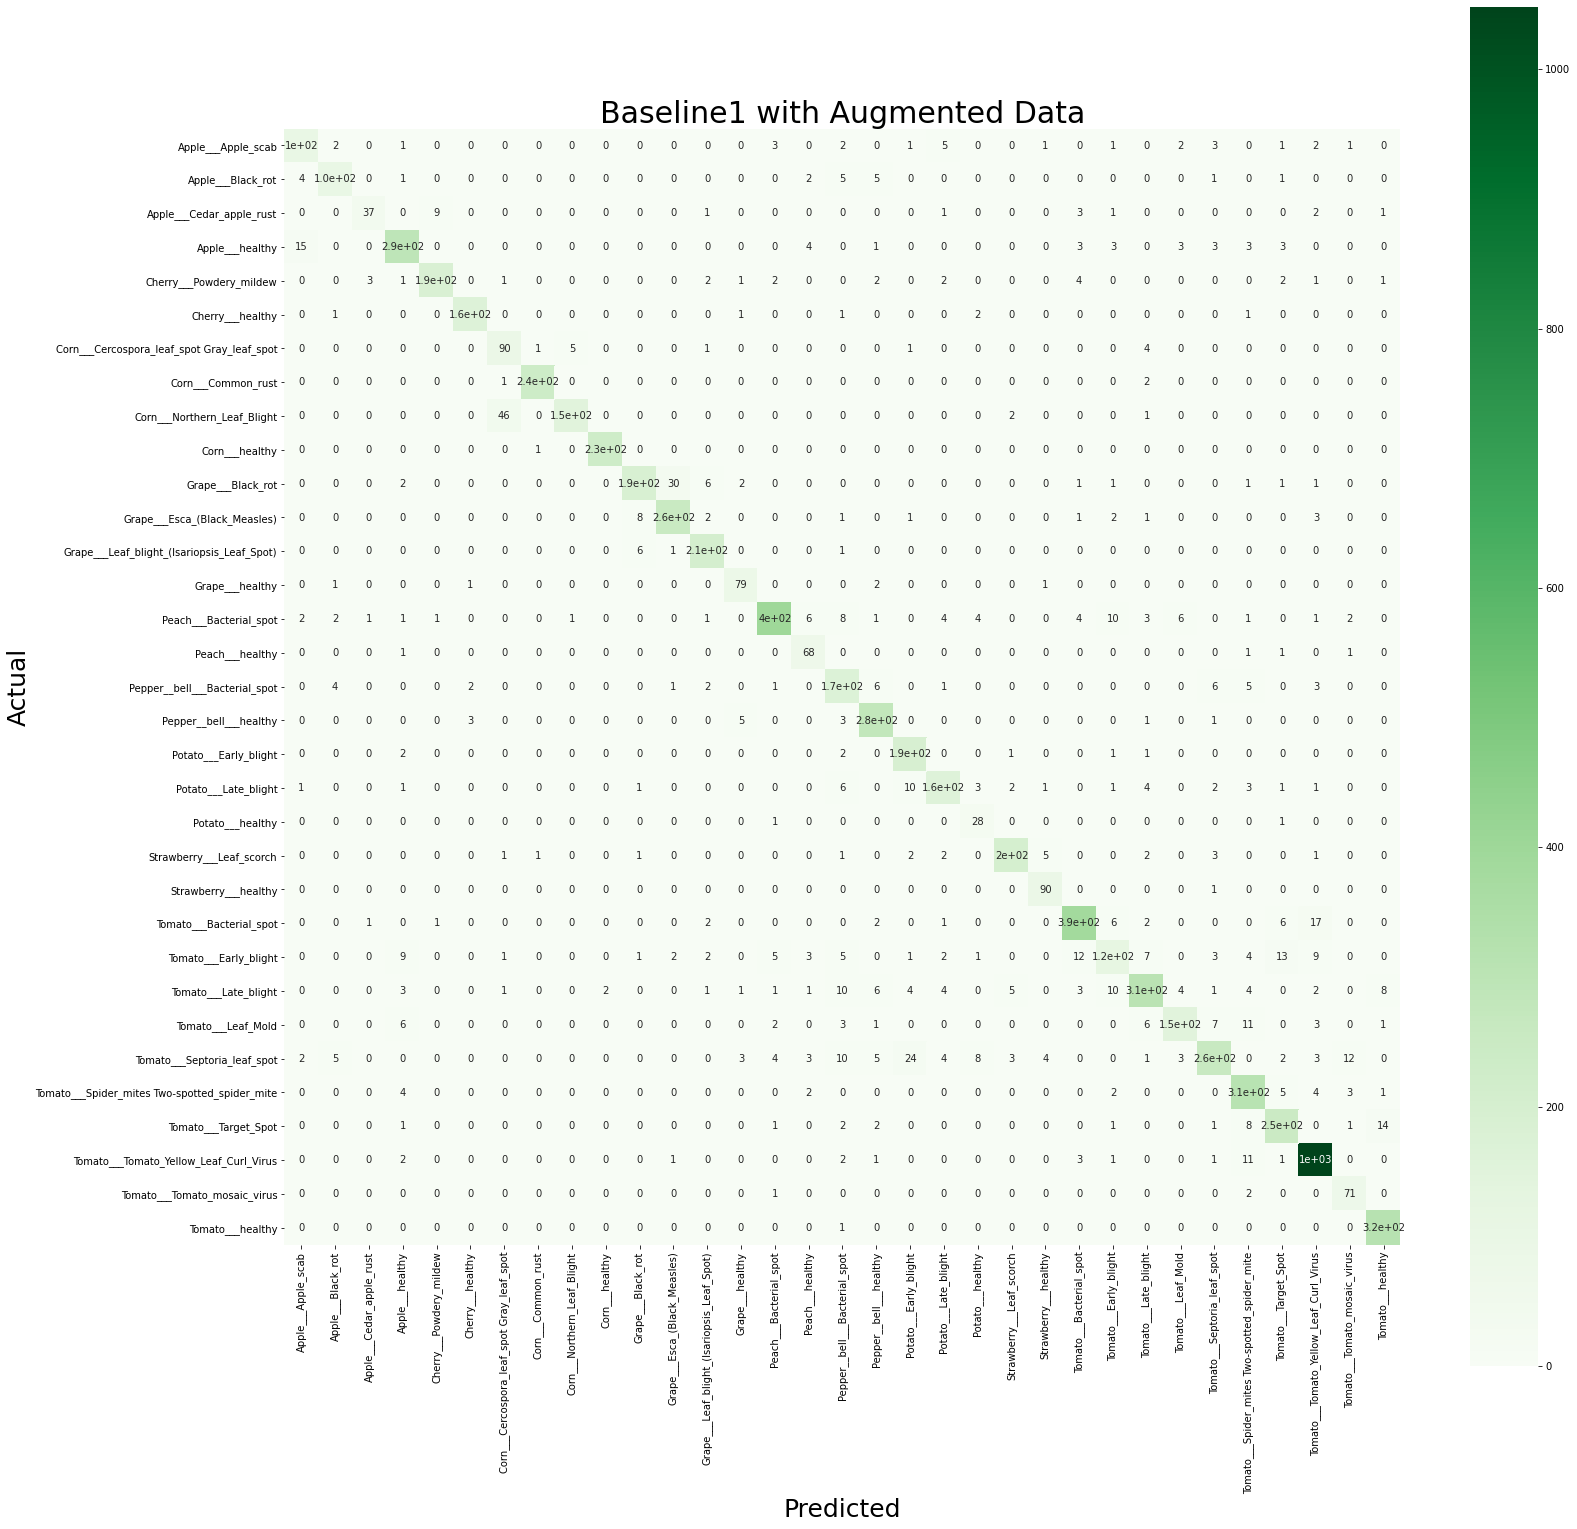

In [ ]:
y_pred1 = np.argmax(predict1, axis=-1) # 모델이 예측한 class label
classes = test_generator.classes[test_generator.index_array] # ground truth 

# 총 33개 클래스
class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred1)
plt.figure(figsize=(25, 25))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax.set_title("Baseline1 with Augmented Data", fontsize=30)
ax.set_ylabel('Actual', fontsize=25)
ax.set_xlabel('Predicted', fontsize=25)

* Baseline1 with Raw Data

Text(0.5, 324.5937499999999, 'Predicted')

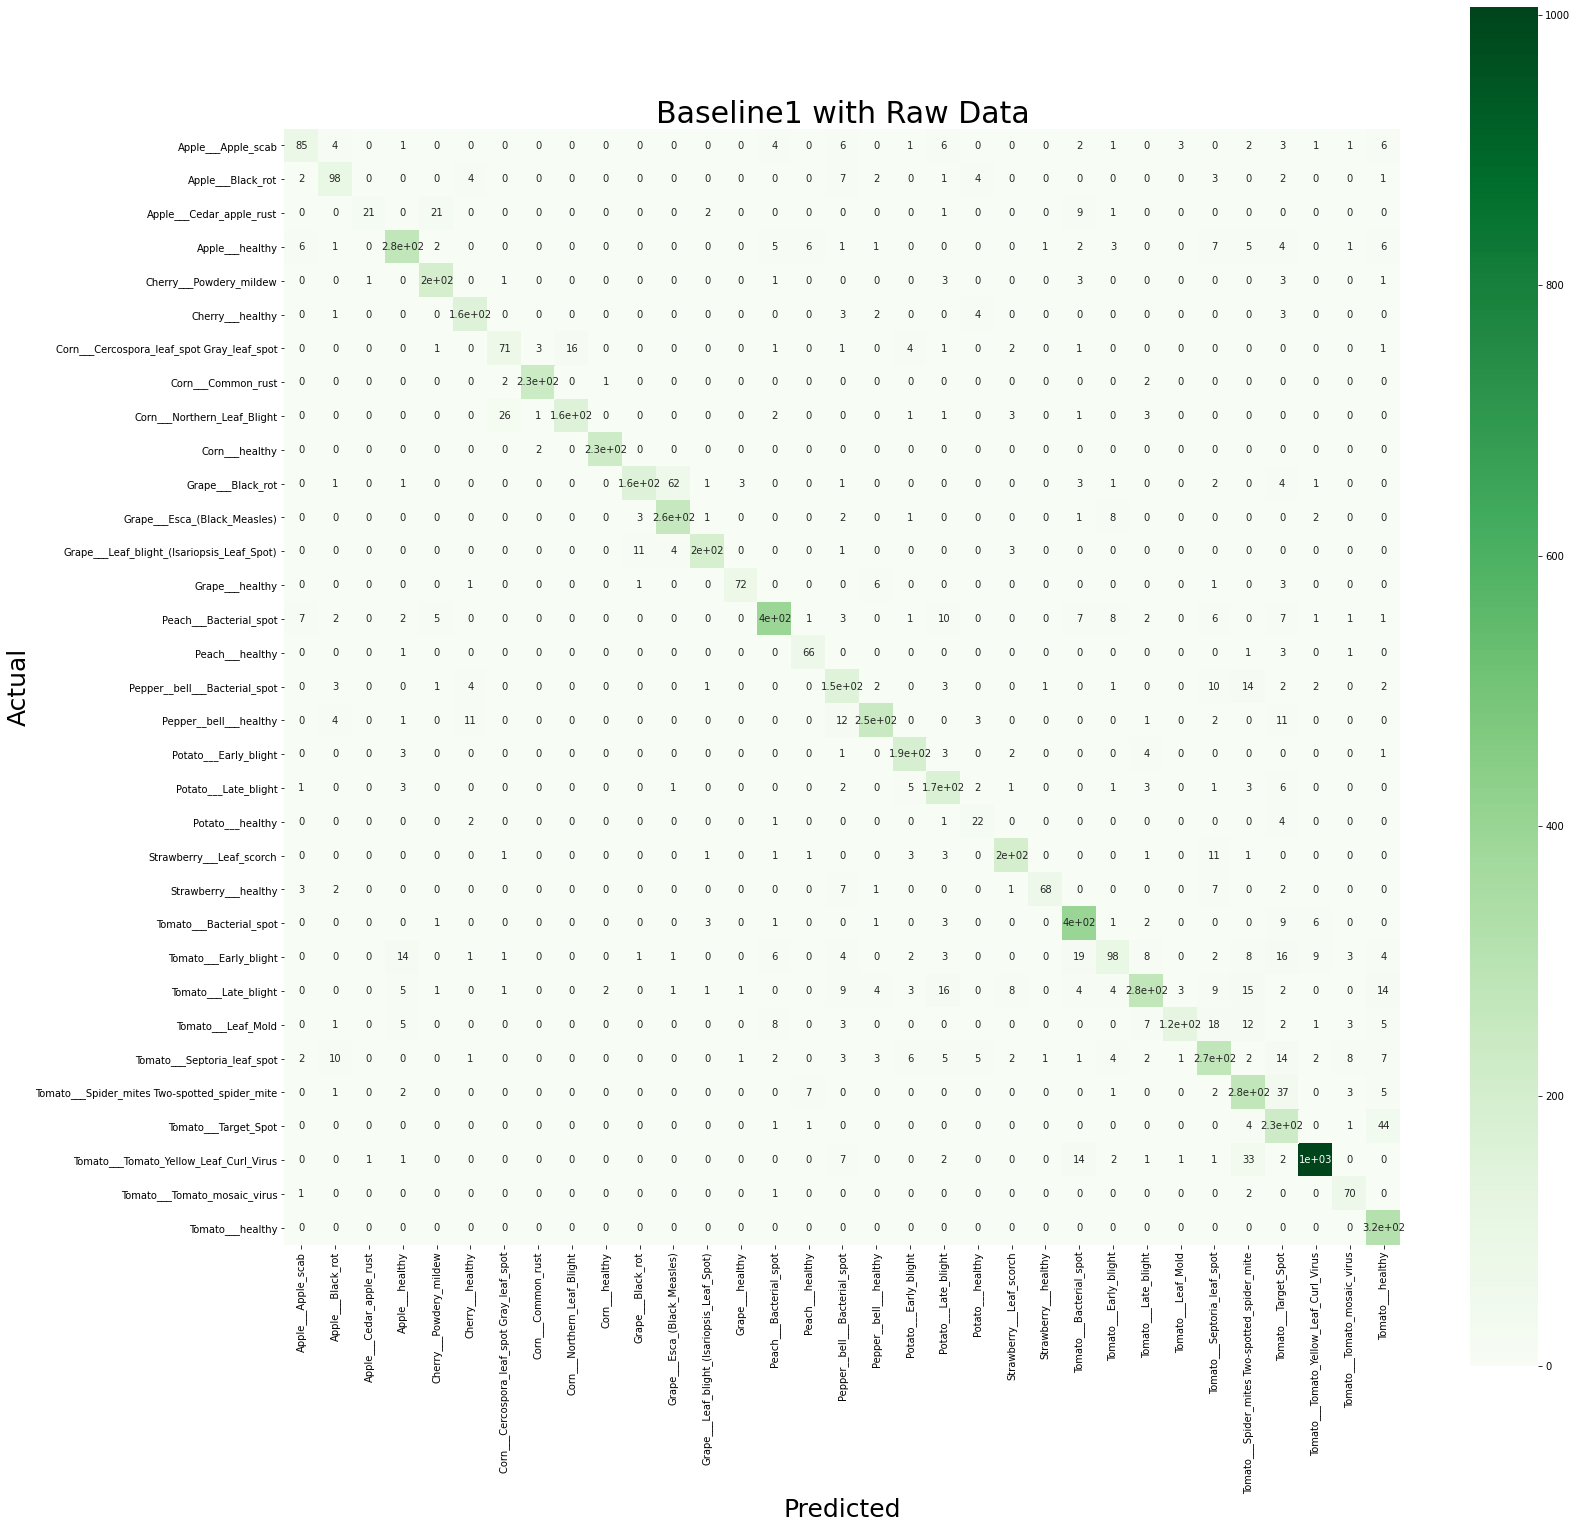

In [ ]:
y_pred2 = np.argmax(predict2, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred2)
plt.figure(figsize=(25, 25))
ax2 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax2.set_title("Baseline1 with Raw Data", fontsize=30)
ax2.set_ylabel('Actual', fontsize=25)
ax2.set_xlabel('Predicted', fontsize=25)

* Baseline2 with Augmented Data

Text(0.5, 324.5937499999999, 'Predicted')

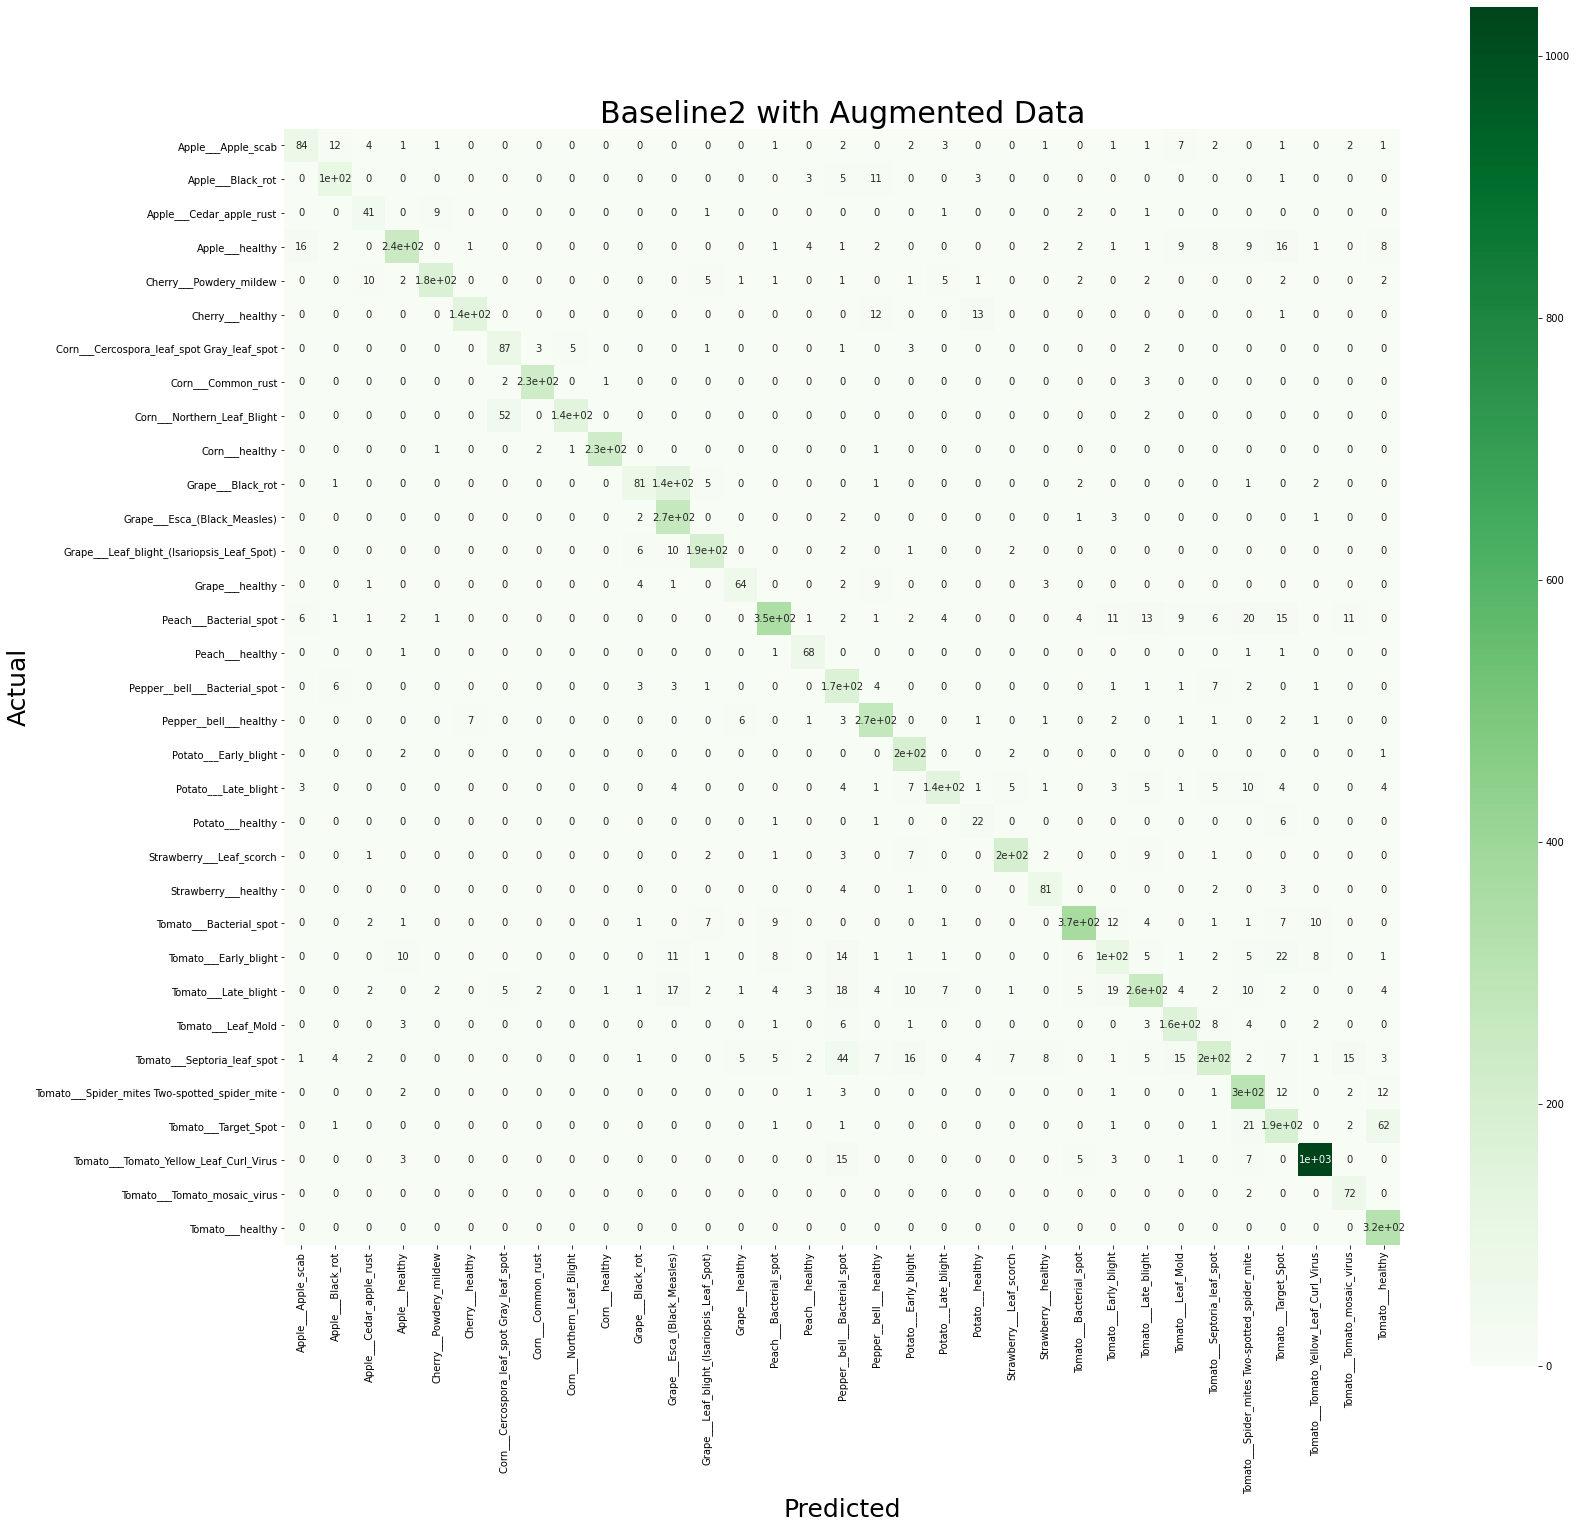

In [ ]:
y_pred3 = np.argmax(predict3, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred3)
plt.figure(figsize=(25, 25))
ax3 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax3.set_title("Baseline2 with Augmented Data", fontsize=30)
ax3.set_ylabel('Actual', fontsize=25)
ax3.set_xlabel('Predicted', fontsize=25)

* Baseline2 with Raw Data

Text(0.5, 324.5937499999999, 'Predicted')

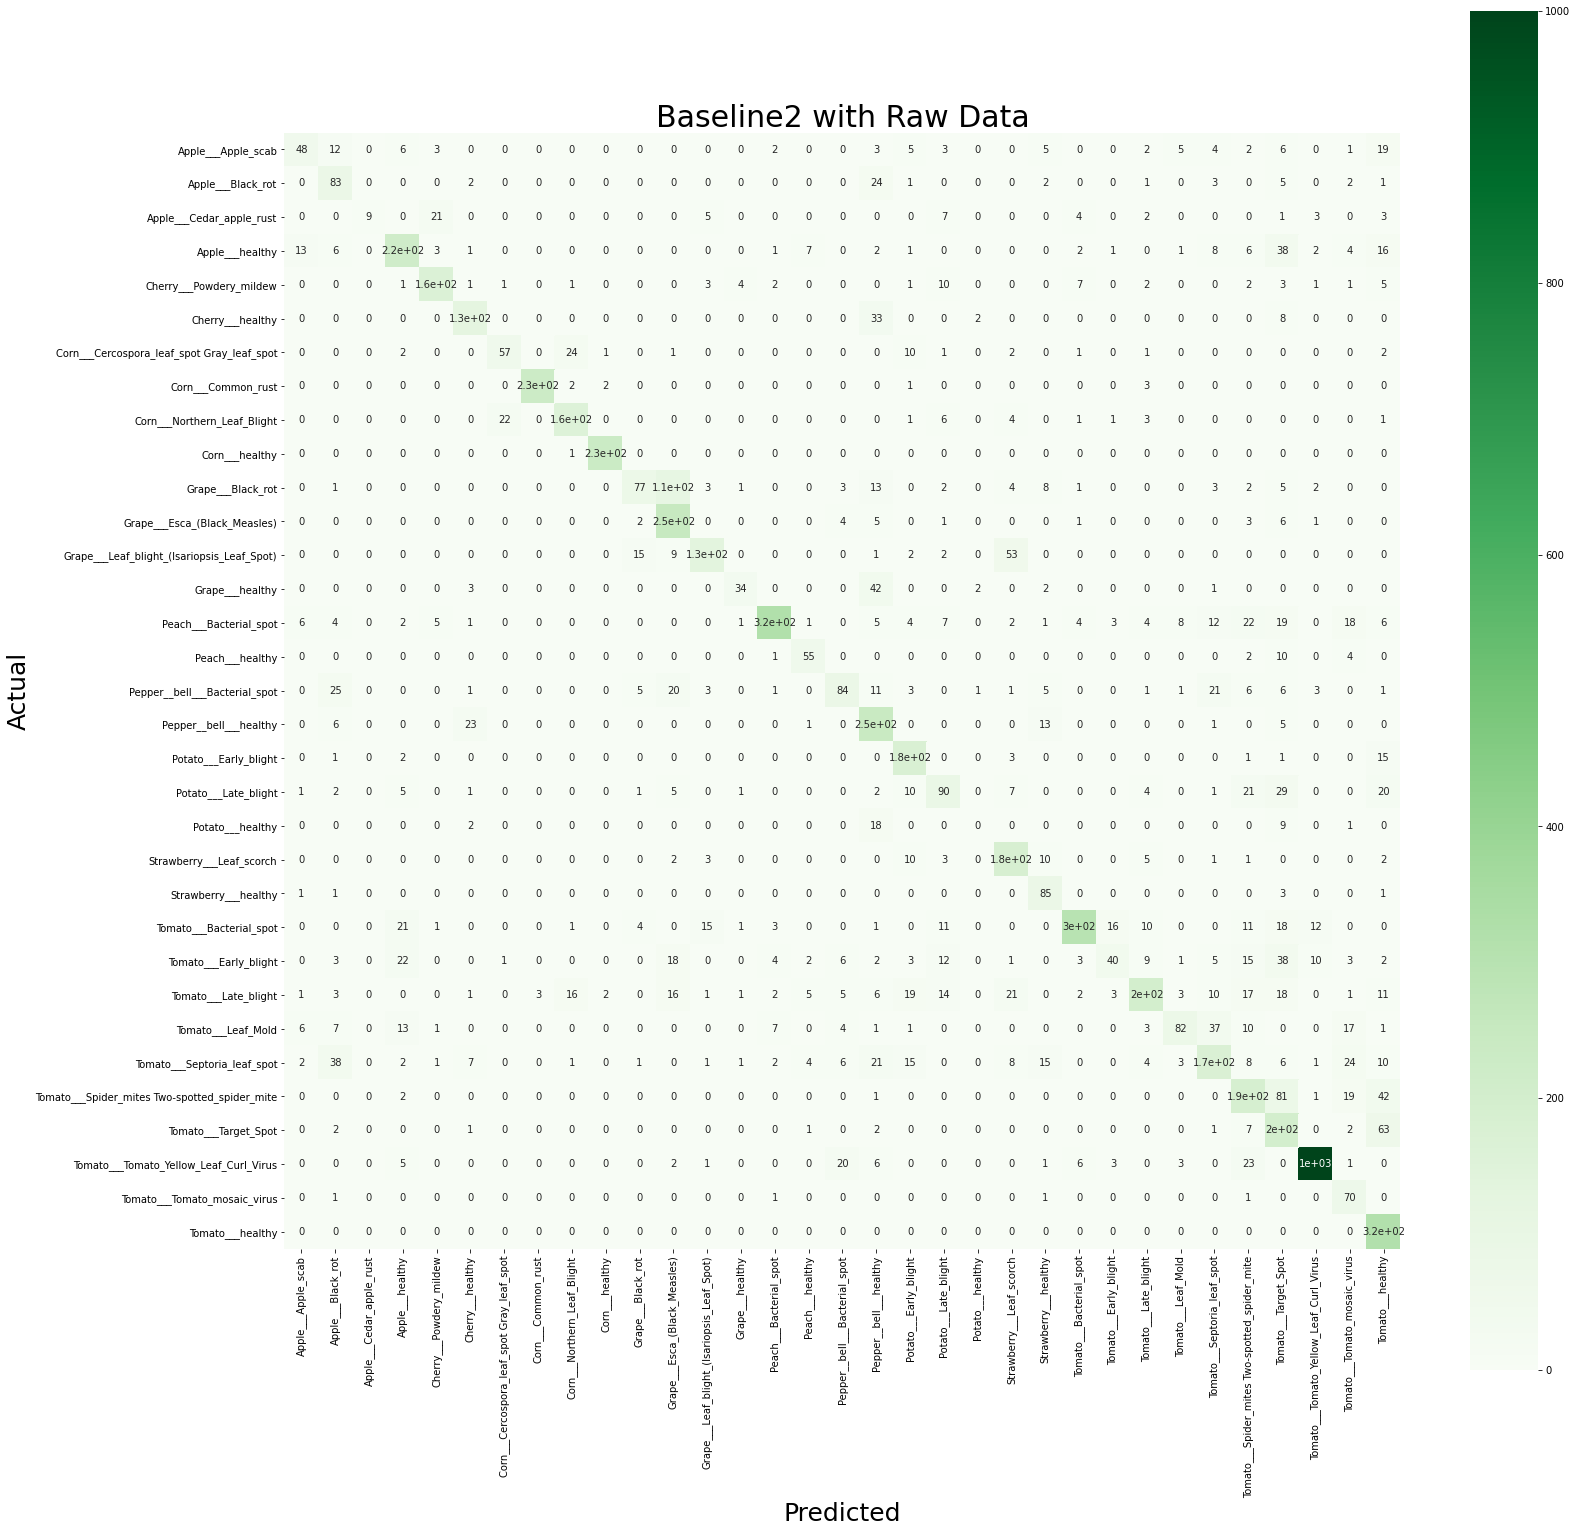

In [ ]:
y_pred4 = np.argmax(predict4, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 10})
cm = confusion_matrix(classes, y_pred4)
plt.figure(figsize=(25, 25))
ax4 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax4.set_title("Baseline2 with Raw Data", fontsize=30)
ax4.set_ylabel('Actual', fontsize=25)
ax4.set_xlabel('Predicted', fontsize=25)

* baseline 모델: 대각선 위아래로 각 클래스별 False Positive, False Negative값들이 0이 아닌 값들이 많이 분포

* pretrained model: 대각선(True Positive) 이외의 값들이 거의 대부분 0 

* DenseNet

Text(0.5, 656.9999999999998, 'Predicted')

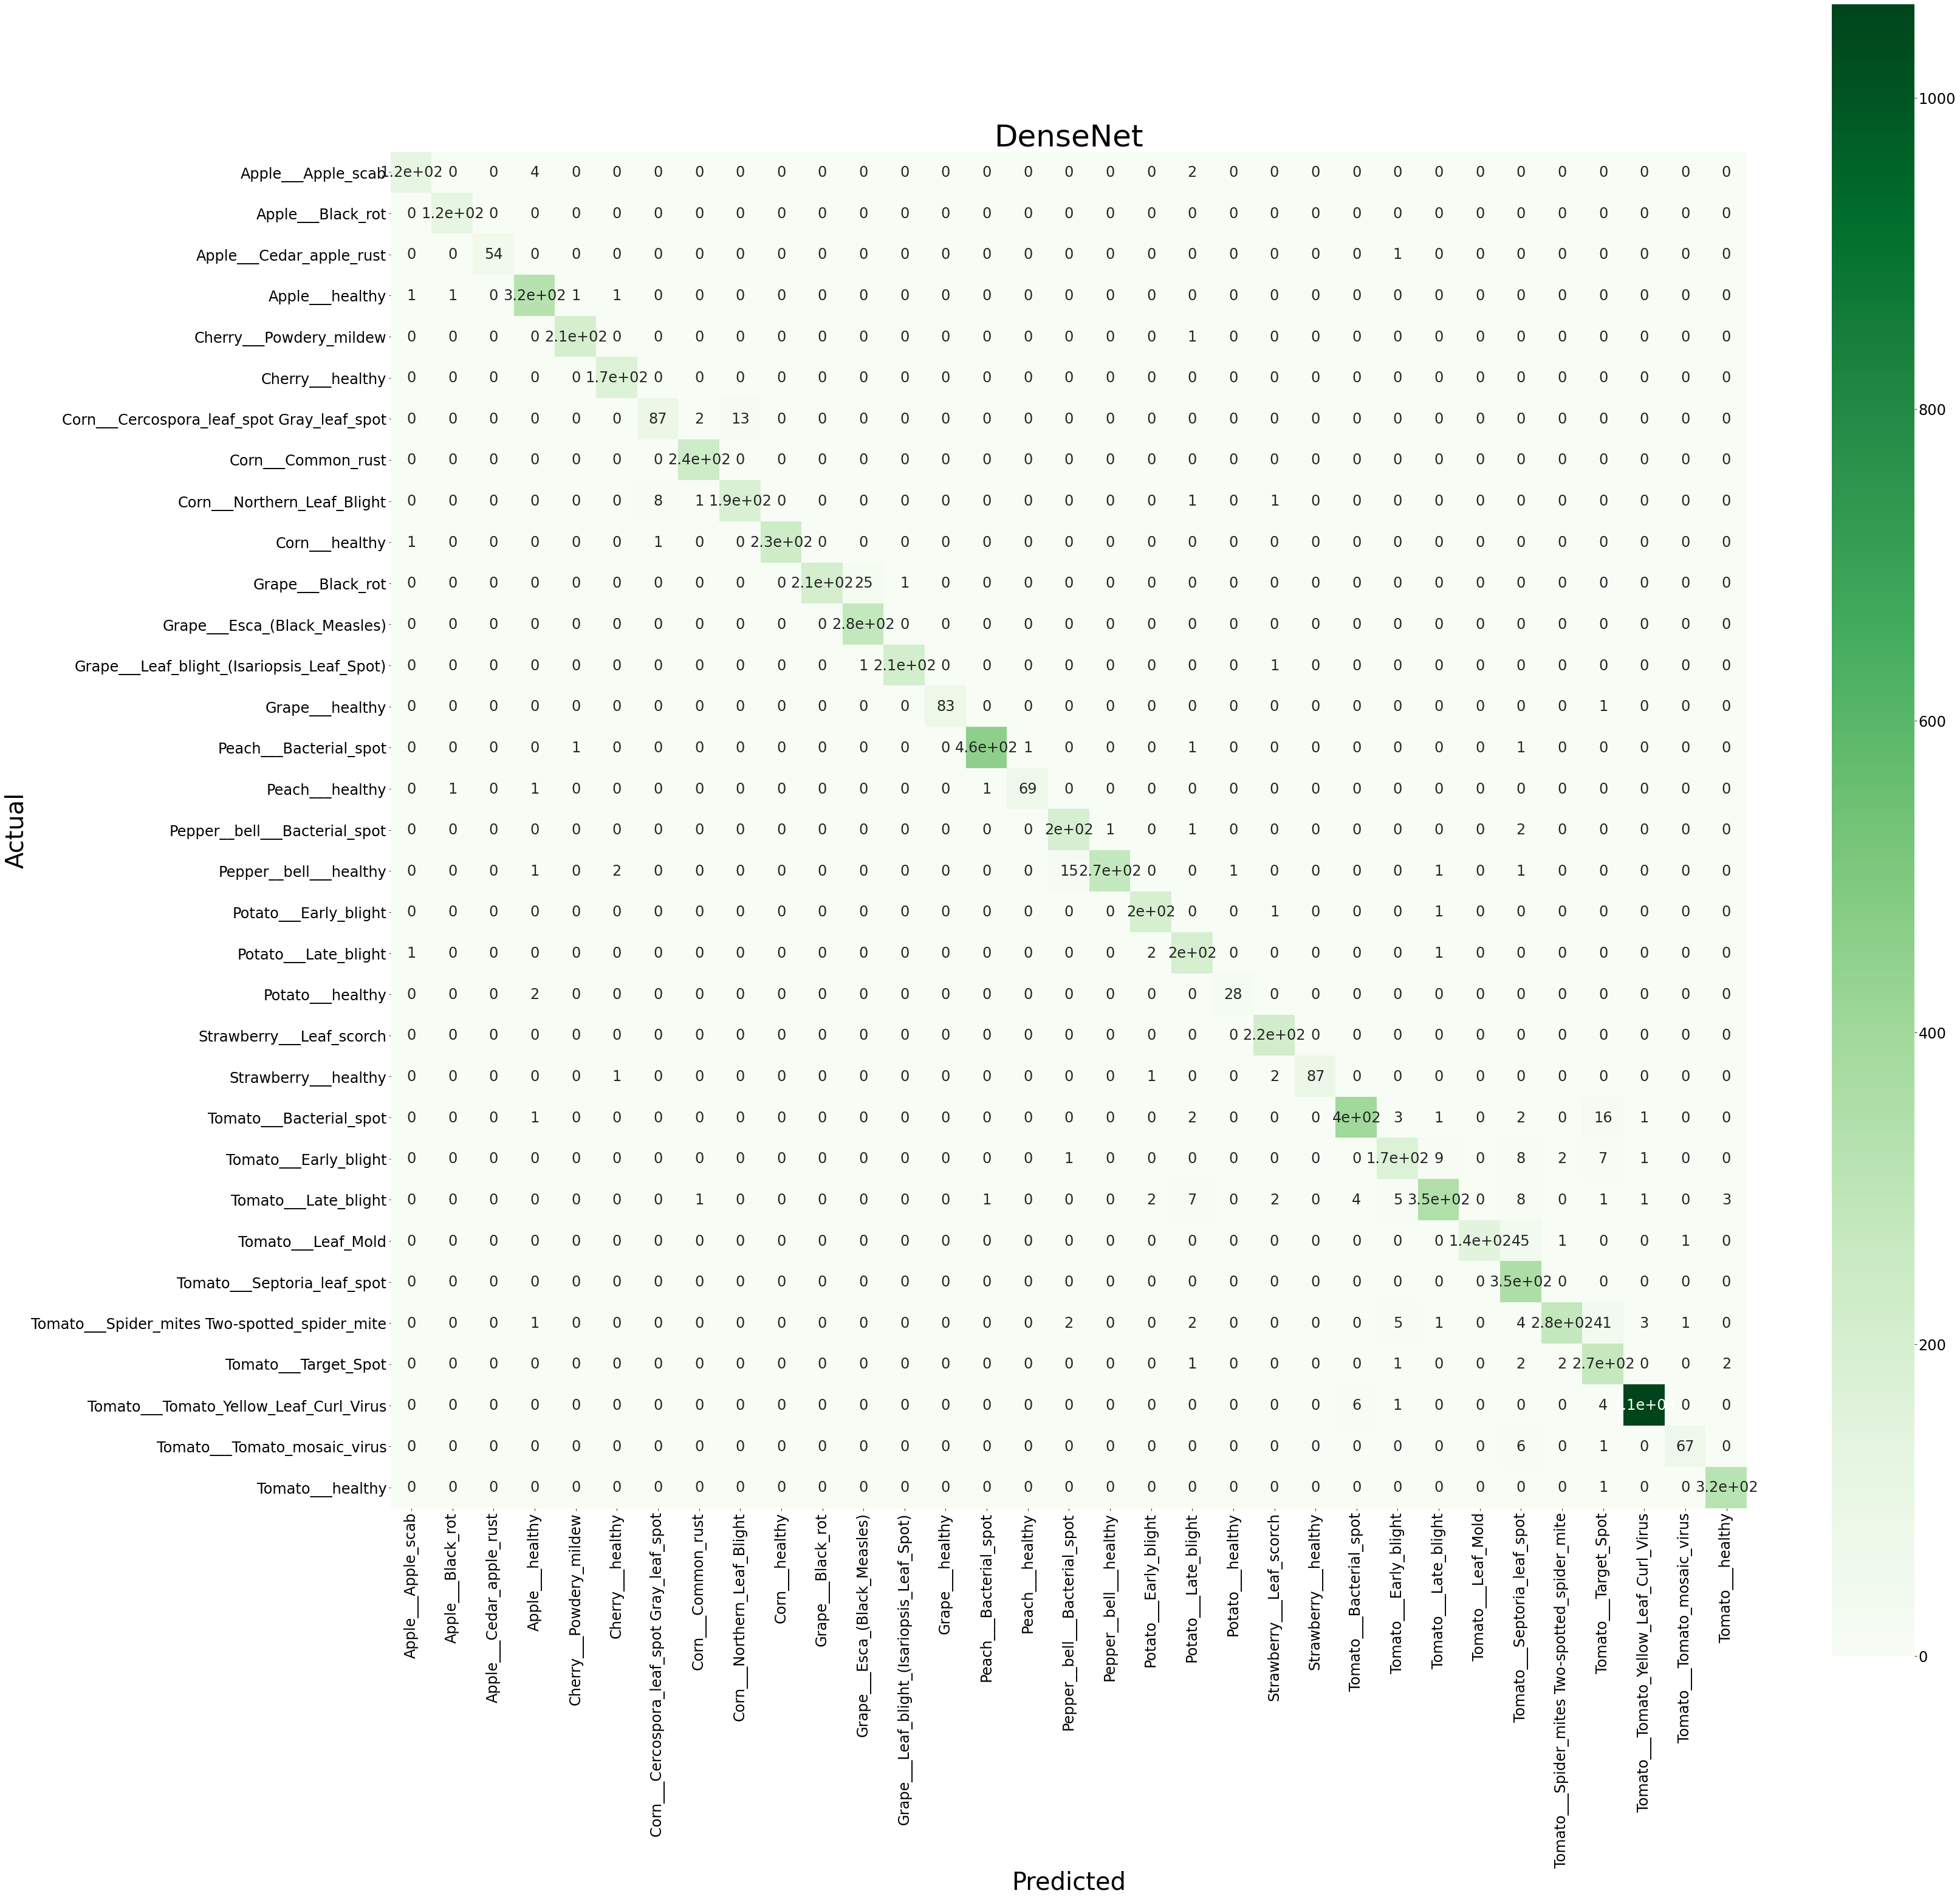

In [ ]:
y_pred5 = np.argmax(predict5, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(classes, y_pred5)
plt.figure(figsize=(40, 40))
ax5 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax5.set_title("DenseNet", fontsize=50)
ax5.set_ylabel('Actual', fontsize=40)
ax5.set_xlabel('Predicted', fontsize=40)

* DenseNet Freeze

Text(0.5, 656.9999999999998, 'Predicted')

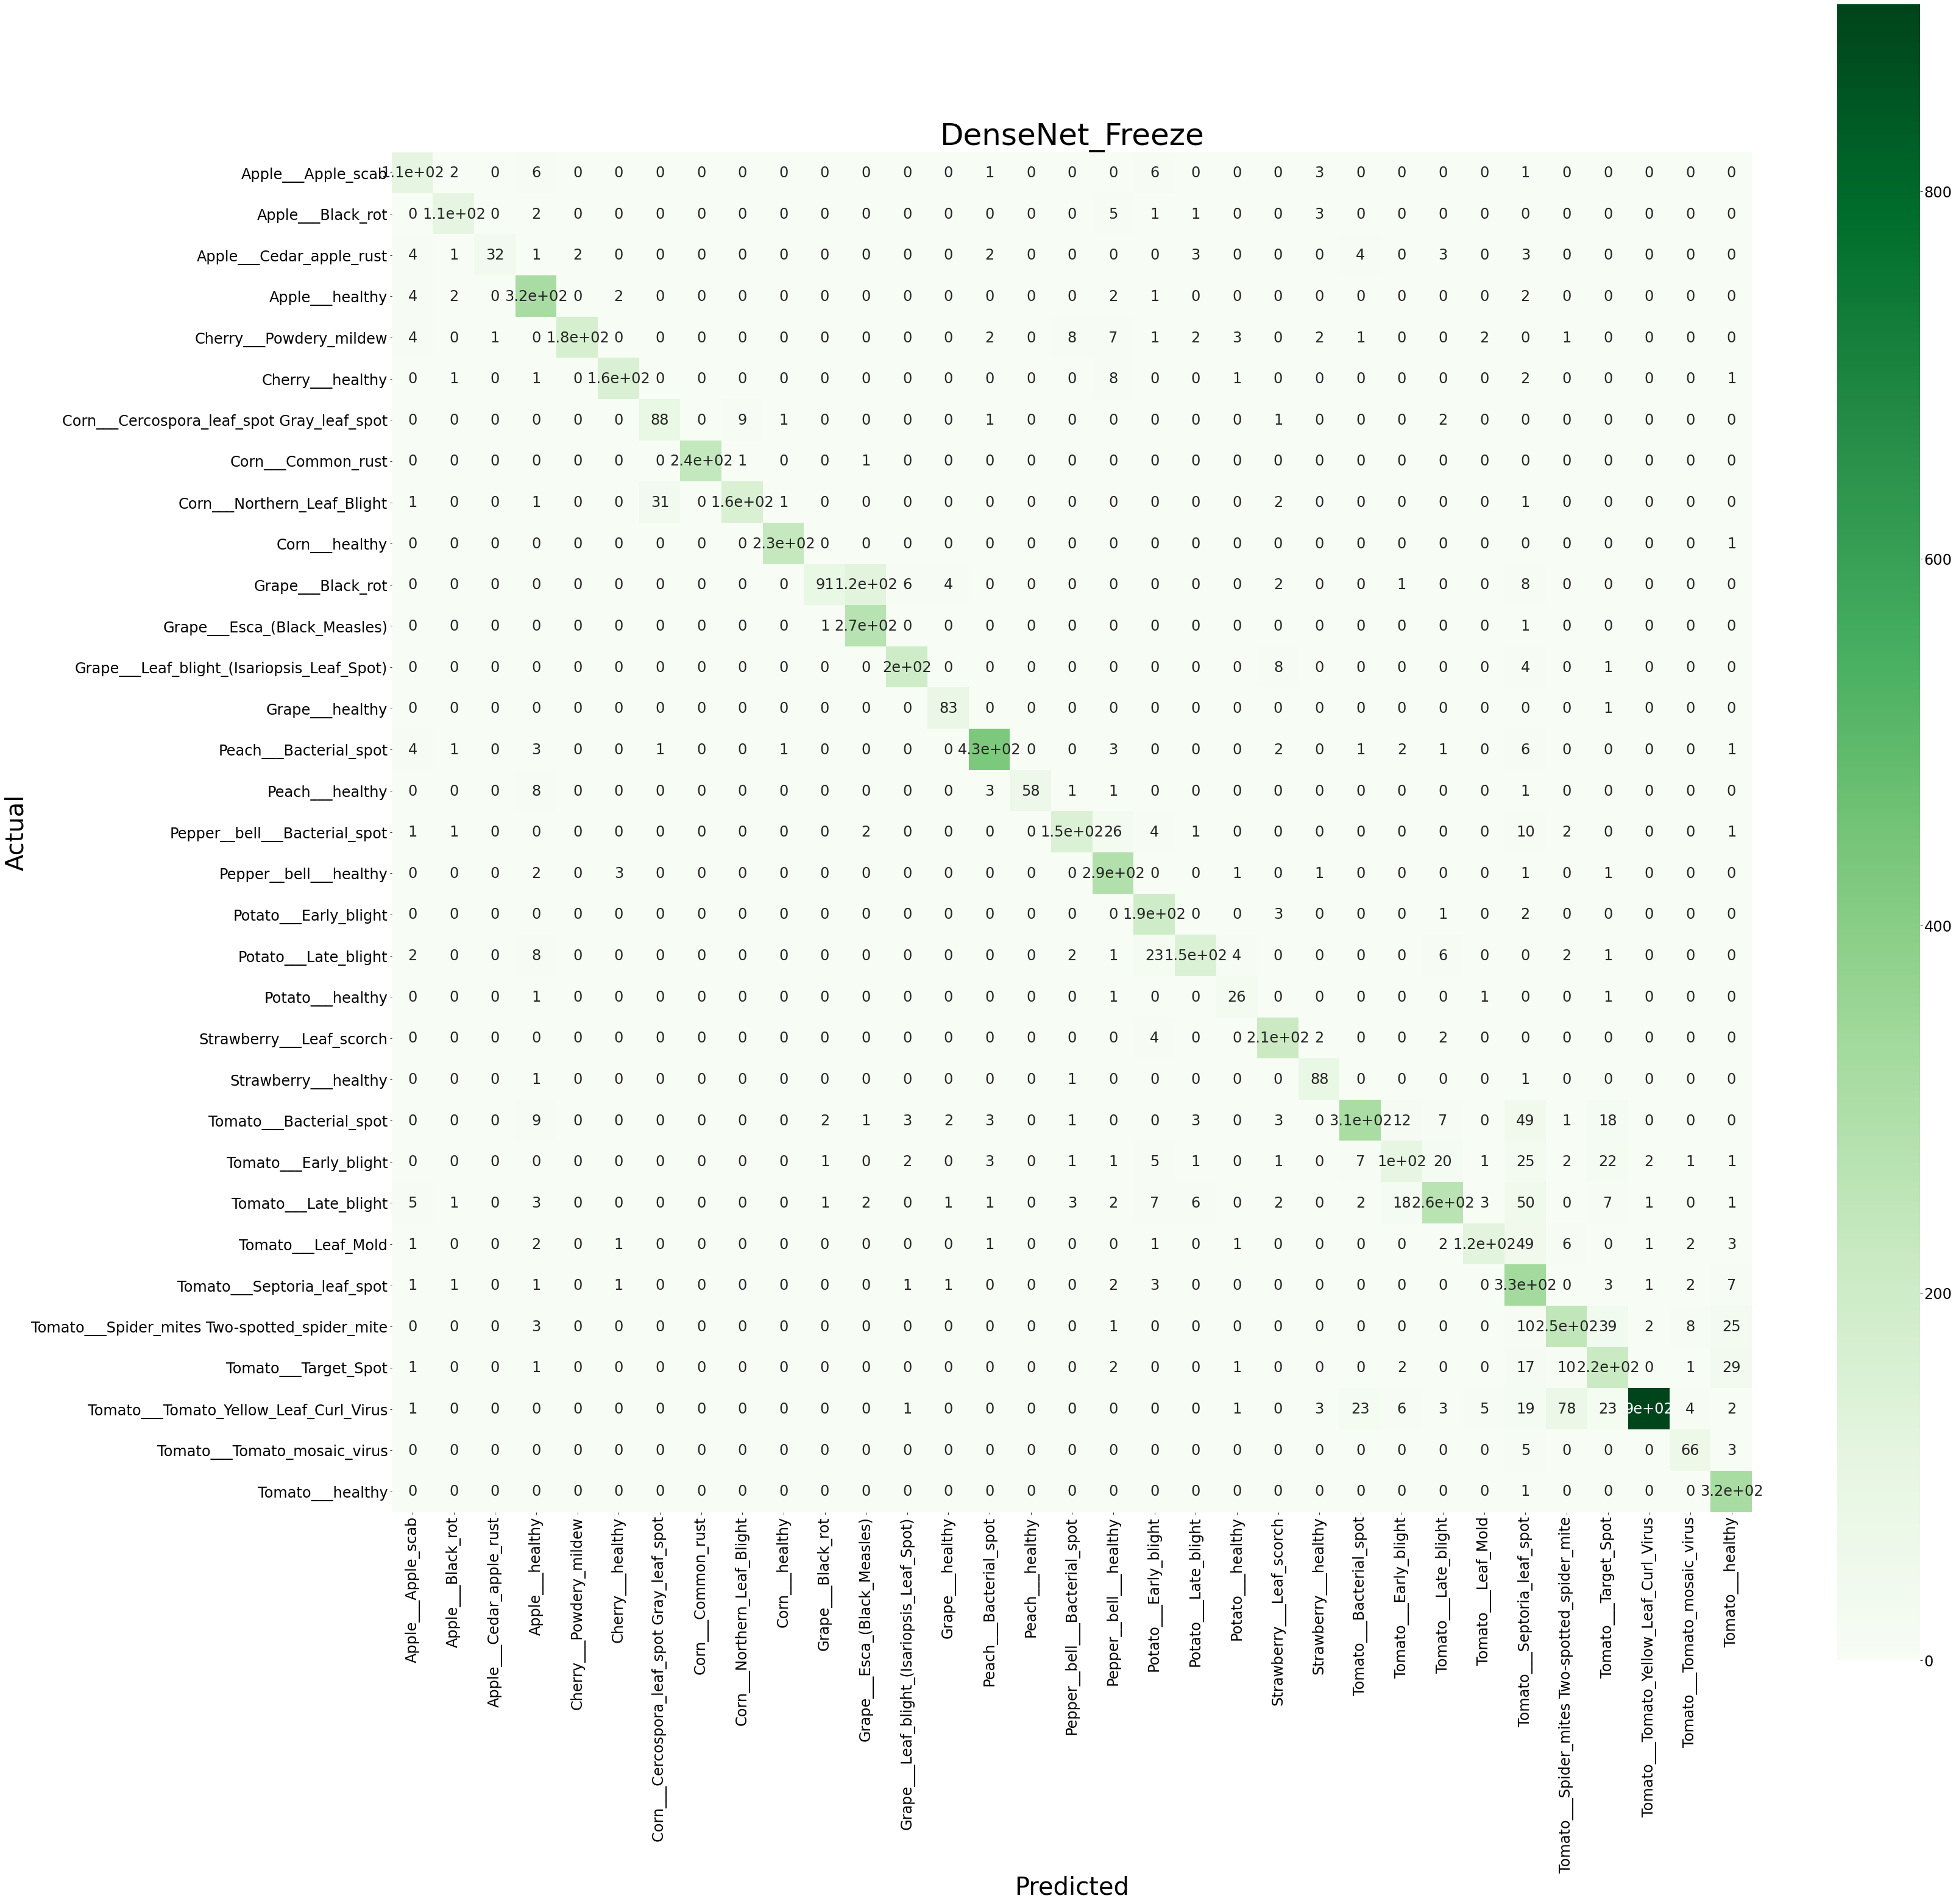

In [ ]:
y_pred6 = np.argmax(predict6, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 24})
cm = confusion_matrix(classes, y_pred6)
plt.figure(figsize=(50, 50))
ax6 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax6.set_title("DenseNet_Freeze", fontsize=50)
ax6.set_ylabel('Actual', fontsize=40)
ax6.set_xlabel('Predicted', fontsize=40)

* ResNet

Text(0.5, 656.9999999999998, 'Predicted')

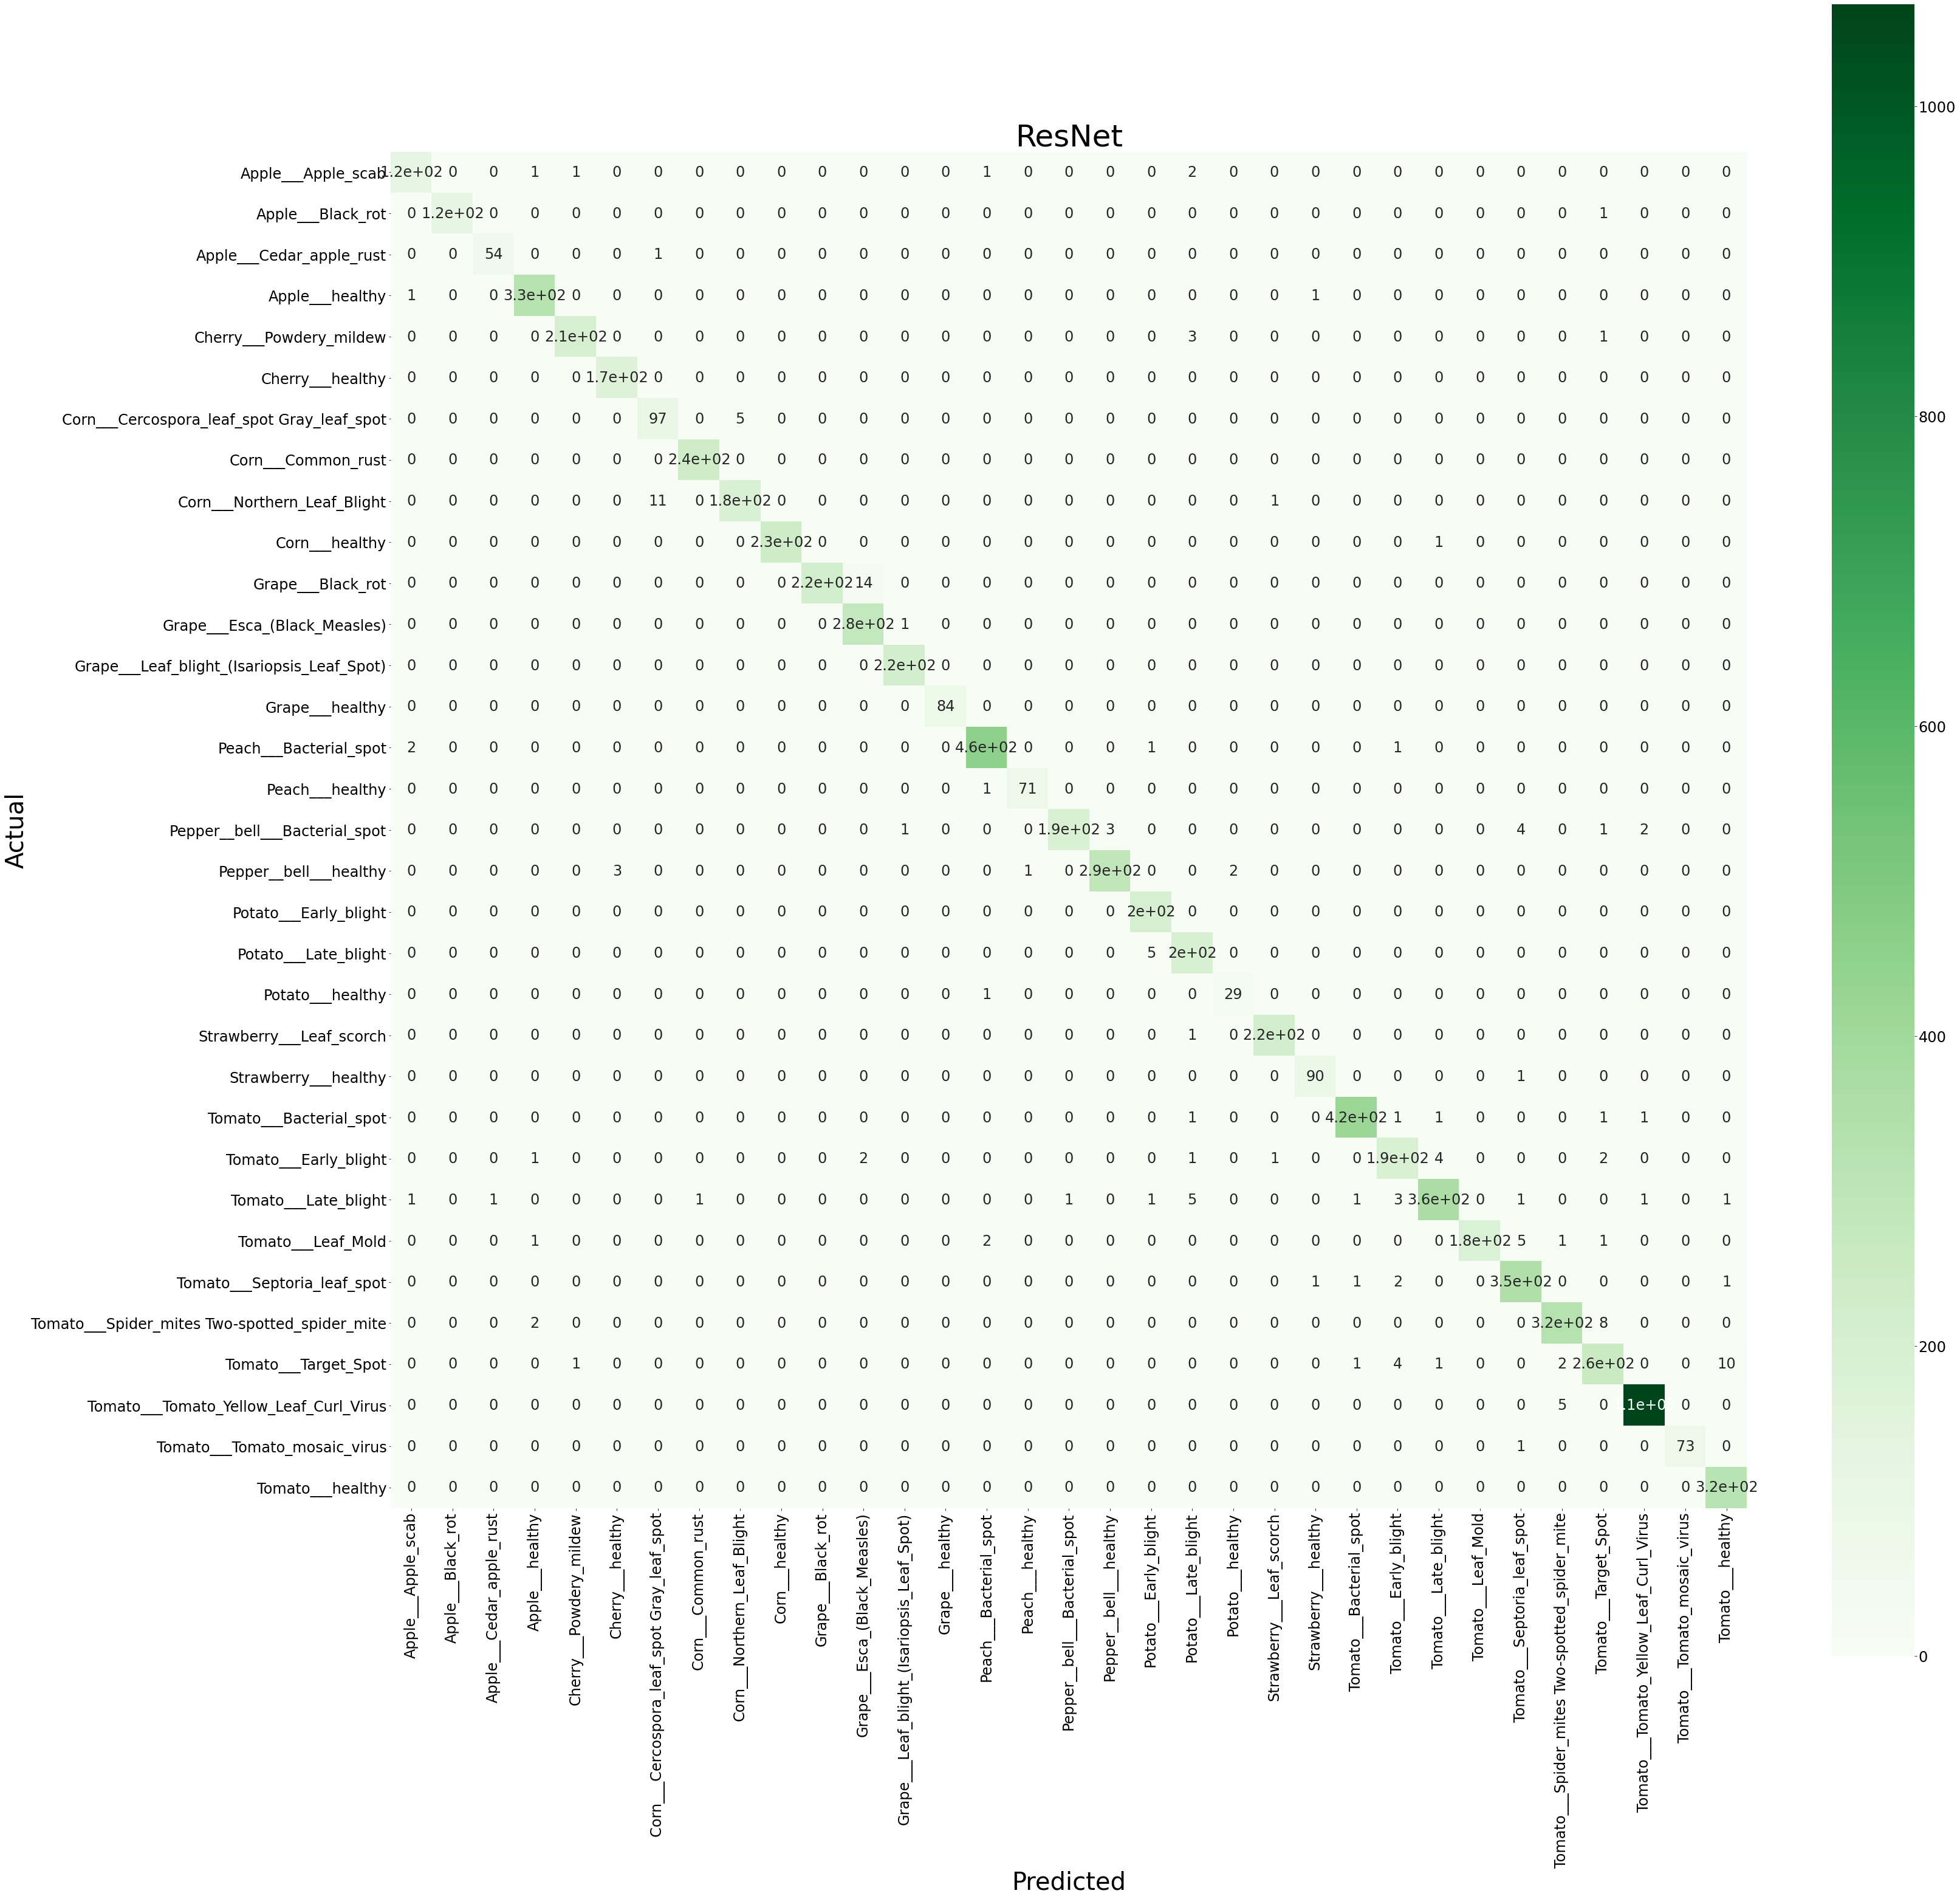

In [ ]:
y_pred7 = np.argmax(predict7, axis=-1)
classes = test_generator.classes[test_generator.index_array]

class_names = ['Apple___Apple_scab', 'Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy', 'Cherry___Powdery_mildew','Cherry___healthy','Corn___Cercospora_leaf_spot Gray_leaf_spot','Corn___Common_rust',
 'Corn___Northern_Leaf_Blight','Corn___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy','Peach___Bacterial_spot','Peach___healthy','Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']


plt.rcParams.update({'font.size': 24})
cm = confusion_matrix(classes, y_pred7)
plt.figure(figsize=(50, 50))
ax7 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=class_names, yticklabels=class_names)
ax7.set_title("ResNet", fontsize=50)
ax7.set_ylabel('Actual', fontsize=40)
ax7.set_xlabel('Predicted', fontsize=40)

* 질병 분류 문제이기 때문에 질병이 있는데 없다고 예측한 FN(False Negative)의 값, (2종 오류에 해당하는 값) 또한 중요한 성능 평가 metric

* 대표 예시로 질병의 종류가 가장 많은 토마토에 대해서 FN 값을 비교
* 각 모델의 Confusion Matrix에서 "Tomato__healthy"라고 예측하였는데 실제 질병이 있는 경우의 개수를 세어본 결과는 다음과 같다.

> Baseline1 with Augmented: 24

> Baseline1 with Raw: 79

> Baseline2 with Augmented: 81

> Baseline2 with Raw: 129

> DenseNet No Freeze: 5

> DenseNet Freeze: 71

> ResNet: 12

* 결과를 보면 베이스라인에서 클래스 불균형을 해소한 것이 더 낮은 값을 갖고 Pretrained 모델을 이용한 경우가 그보다 더 낮은 값을 가짐
**데이터의 불균형을 해소한 것이 더 낮은 FN 값을 가지고 Baseline보다 Pretrained 모델이 2종 오류를 적게 범함을 알 수 있음.**


###f1 score

* f1 score은  precision과 recall의 조화평균

> <img src="https://drive.google.com/uc?export=view&id=1OvZfmhlOT8BgjPEQtITdpv1k_BEUvISR">

> <img src="https://drive.google.com/uc?export=view&id=1M1-WPP36PLnKv4w6lBylIo-Rs7fCfnC-">


4가지 class의 f1 score를 비교해보았다. 4가지 class는 

- 데이터가 가장 많은 **"Tomato yellow leaf(label: 30)"**(Augmentation X)
- 데이터가 가장 적었던 **"Potato healthy(label: 20)"**(Augmentation O) 
- Augmented data기준으로 중간정도의 데이터를 가지고 있는 **"Apple healthy(label: 3)"**(Augmentation X)
- Augmented data기준으로 중간정도의 데이터를 가지고 있는 **"Cherry healthy(label: 5)"**(Augmentation O)



Label Info.

In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Cherry___Powdery_mildew': 4,
 'Cherry___healthy': 5,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 6,
 'Corn___Common_rust': 7,
 'Corn___Northern_Leaf_Blight': 8,
 'Corn___healthy': 9,
 'Grape___Black_rot': 10,
 'Grape___Esca_(Black_Measles)': 11,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 12,
 'Grape___healthy': 13,
 'Peach___Bacterial_spot': 14,
 'Peach___healthy': 15,
 'Pepper__bell___Bacterial_spot': 16,
 'Pepper__bell___healthy': 17,
 'Potato___Early_blight': 18,
 'Potato___Late_blight': 19,
 'Potato___healthy': 20,
 'Strawberry___Leaf_scorch': 21,
 'Strawberry___healthy': 22,
 'Tomato___Bacterial_spot': 23,
 'Tomato___Early_blight': 24,
 'Tomato___Late_blight': 25,
 'Tomato___Leaf_Mold': 26,
 'Tomato___Septoria_leaf_spot': 27,
 'Tomato___Spider_mites Two-spotted_spider_mite': 28,
 'Tomato___Target_Spot': 29,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 30,
 'Tomato___Tom


> <img src="https://drive.google.com/uc?export=view&id=1zi3QPdxOGn-Rav3vk3AI5o9TgHiV349L">

**------------------------------------------------------------------------------------------------------------------------**

> <img src="https://drive.google.com/uc?export=view&id=1RGHhWHaqOVOvk9CZe7L_2qJXoPq4Z8Ti">

* 데이터가 적은 클래스에 대한 분류가 잘 안되었다면  Model2와 같이 accuracy는 높게 나올 수 있음
* f1 score: imbalance인 데이터에 대해서는 accuracy만 보면 높은 모델이 실제로 데이터가 적은 클래스에 대한 예측력이 낮을 수도 있는걸 보완

* **accuracy는 Model2가 높지만 f1 score은 데이터가 적은 클래스의 분류가 비교적 잘 수행된 Model1이 더 높음**

* **따라서 f1 score와 accuracy를 둘 다 보는 것이 중요하다.**

* Baseline 1 (Augmented vs. Raw)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict1,axis=-1))) #aug
print(classification_report(classes, np.argmax(predict2,axis=-1))) #raw

score1 = loaded_model1.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline1 augmented's acc: ",score1[1])
score2 = loaded_model2.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline1 raw's acc: ",score2[1])

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       126
           1       0.88      0.85      0.86       124
           2       0.88      0.67      0.76        55
           3       0.89      0.88      0.89       329
           4       0.94      0.90      0.92       210
           5       0.96      0.96      0.96       170
           6       0.64      0.88      0.74       102
           7       0.99      0.99      0.99       238
           8       0.96      0.75      0.84       197
           9       0.99      1.00      0.99       232
          10       0.92      0.81      0.86       236
          11       0.88      0.93      0.90       276
          12       0.91      0.96      0.94       215
          13       0.86      0.94      0.90        84
          14       0.95      0.87      0.91       459
          15       0.76      0.94      0.84        72
          16       0.73      0.84      0.78       199
          17       0.89    

**Baseline1 f1 score 비교**
- High **"Tomato yellow leaf(label: 30)"**(Aug X)
  - raw: 0.96, aug: 0.97
- Low **"Potato healthy(label: 20)"**(Aug O) 
  - raw: 0.63, aug: 0.74
- Medium **"Apple healthy(label: 3)"**(Aug X)
  - raw: 0.86, aug: 0.89
- Medium **"Cherry healthy(label: 5)"**(Aug O)
  - raw: 0.89, aug: 0.96

* Baseline1 모델에서 augmentation을 적용한 클래스의 f1 score가 증가 폭이 더 큼
 * **=> 데이터가 적은 클래스에 augmentation을 적용한 것이 분류 성능을 높이는 효과** 

* 데이터가 가장 많은 "Tomato yellow leaf"의 f1 score: 0.97 (가장 높음)
* 데이터가 가장 적은 "Potato healthy": 0.74 (비교적 낮음)

* Baseline 2 (Augmented vs. Raw)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict3,axis=-1))) #aug
print(classification_report(classes, np.argmax(predict4,axis=-1))) #raw

score3 = loaded_model3.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline2 augmented's acc: ",score3[1])
score4 = loaded_model4.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("baseline2 raw's acc: ",score4[1])

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       126
           1       0.79      0.81      0.80       124
           2       0.64      0.75      0.69        55
           3       0.90      0.74      0.82       329
           4       0.93      0.83      0.88       210
           5       0.95      0.85      0.89       170
           6       0.60      0.85      0.70       102
           7       0.97      0.97      0.97       238
           8       0.96      0.73      0.83       197
           9       0.99      0.98      0.98       232
          10       0.82      0.34      0.48       236
          11       0.59      0.97      0.73       276
          12       0.89      0.90      0.89       215
          13       0.83      0.76      0.80        84
          14       0.91      0.76      0.83       459
          15       0.82      0.94      0.88        72
          16       0.56      0.85      0.67       199
          17       0.83    

**Baseline2 f1 score 비교**
- High **"Tomato yellow leaf(label: 30)"**(Aug X)
  - raw: 0.95, aug: 0.97
- Low **"Potato healthy(label: 20)"**(Aug O) 
  - raw: 0.00, aug: 0.59
- Medium **"Apple healthy(label: 3)"**(Aug X)
  - raw: 0.69, aug: 0.82
- Medium **"Cherry healthy(label: 5)"**(Aug O)
  - raw: 0.74, aug: 0.89

* Baseline2 모델: f1 score가 전체적으로 증가
* 특히 augmentation을 적용한 클래스의 f1 score가 크게 증가
* "Potato health"는 0.59 증가, "Cherry healthy":0.25 증가
* 반면 augmentation을 적용하지 않은 클래스는 비교적 작게 증가

* "Potato healthy"의 경우 augmentation 이전의 train data가 91개 => augmentation후의 경우 711개로 크게 증가. 
* => **데이터 불균형에 따라서 각 클래스에 대한 모델의 예측성능이 크게 달라진다는 것을 알 수 있음**

* DenseNet (No Freeze vs. Freeze)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict5,axis=-1))) #DenseNet
print(classification_report(classes, np.argmax(predict6,axis=-1))) #DenseNet_Freeze

score5 = loaded_model5.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("DenseNet's acc: ",score5[1])
score6 = loaded_model6.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("Freezed DenseNet's acc: ",score6[1])

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       126
           1       0.98      1.00      0.99       124
           2       1.00      0.98      0.99        55
           3       0.97      0.99      0.98       329
           4       0.99      1.00      0.99       210
           5       0.98      1.00      0.99       170
           6       0.91      0.85      0.88       102
           7       0.98      1.00      0.99       238
           8       0.93      0.94      0.94       197
           9       1.00      0.99      1.00       232
          10       1.00      0.89      0.94       236
          11       0.91      1.00      0.96       276
          12       1.00      0.99      0.99       215
          13       1.00      0.99      0.99        84
          14       1.00      0.99      0.99       459
          15       0.99      0.96      0.97        72
          16       0.92      0.98      0.95       199
          17       1.00    

* DenseNet vs. ResNet

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(classes, np.argmax(predict5,axis=-1))) #DenseNet
print(classification_report(classes, np.argmax(predict7,axis=-1))) #ResNet

score5 = loaded_model5.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("DenseNet's acc: ",score5[1])
score7 = loaded_model7.evaluate_generator(test_generator, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)
print("ResNet's acc: ",score7[1])

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       126
           1       0.98      1.00      0.99       124
           2       1.00      0.98      0.99        55
           3       0.97      0.99      0.98       329
           4       0.99      1.00      0.99       210
           5       0.98      1.00      0.99       170
           6       0.91      0.85      0.88       102
           7       0.98      1.00      0.99       238
           8       0.93      0.94      0.94       197
           9       1.00      0.99      1.00       232
          10       1.00      0.89      0.94       236
          11       0.91      1.00      0.96       276
          12       1.00      0.99      0.99       215
          13       1.00      0.99      0.99        84
          14       1.00      0.99      0.99       459
          15       0.99      0.96      0.97        72
          16       0.92      0.98      0.95       199
          17       1.00    

pretrained model들에 대한 f1 score와 accuracy는 다음과 같다.
> DenseNet_Freeze: f1 score-0.84, accuracy-0.843

> DenseNet: f1 score-0.96, accuracy-0.957

> ResNet: f1 score-0.979, accuracy-0.98

**따라서 적은 수의 데이터를 가지는 클래스도 잘 분류가 되었음을 알 수 있음**



* 모든 모델 성능 요약 표
* augmentation을 통한 클래스 불균형 해소가 f1 score와 accuracy값을 증가시킴

* 모든 모델의 f1 score와 accuracy의 차이가 거의 없음
* => 데이터 크기가 작은 클래스의 분류도 높은 accuracy 만큼이나 잘 수행했다는 것 

> <img src="https://drive.google.com/uc?export=view&id=1x5usnNEfa504VXde_iMjXILPmPZG0NOK">


## **시각화 Using CAM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image as pil_image
import cv2

import glob

import tensorflow as tf
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras import backend as K
from tensorflow.python.framework import ops


import scipy
from scipy import ndimage
from skimage.measure import label, regionprops
from keras.models import load_model, model_from_json
%matplotlib inline

Using TensorFlow backend.


In [ ]:
K.set_learning_phase(False)

In [ ]:
## 1. load model
model = load_model("41-0.0443_halfFreeze.hdf5")

In [ ]:
## 2. image sources

path_c='/content/gdrive/My Drive/dataset_split_aug/test/'
class_indices=['Potato___healthy', 'Corn___healthy' , 'Tomato___healthy','Apple___healthy','Cherry___healthy']

In [ ]:
samples=[{'class_idx': 0,
  'img_path': '/content/gdrive/My Drive/dataset_split_aug/test/Tomato___Septoria_leaf_spot/image (435).JPG',
  'target': 'Tomato___Septoria_leaf_spot'},
 {'class_idx': 1,
  'img_path': '/content/gdrive/My Drive/dataset_split_aug/test/Peach___Bacterial_spot/image (2289).JPG',
  'target': 'Peach___Bacterial_spot'},
 {'class_idx': 3,
  'img_path': '/content/gdrive/My Drive/dataset_split_aug/test/Apple___healthy/image (81).JPG',
  'target': 'Apple___healthy'},
 {'class_idx': 3,
  'img_path': '/content/gdrive/My Drive/dataset_split_aug/test/Pepper__bell___Bacterial_spot/image (989).JPG',
  'target': 'Pepper__bell___Bacterial_spot'},
 {'class_idx': 4,
  'img_path': '/content/gdrive/My Drive/dataset_split_aug/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3334).JPG',
  'target': 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'}] #클래스 인덱스 0,1,3,4고정

In [ ]:
def preprocess_input(img_path):
    img = pil_image.open(img_path).resize((224, 224))
    img_arr = np.asarray(img)[:, :, :3] / 255.
    img_tensor = np.expand_dims(img_arr, 0)
    
    return img_arr, img_tensor

In [ ]:
def generate_cam(model, img_path, class_idx):
    
    ## img_path -> preprocessed image tensor
    img_arr, img_tensor = preprocess_input(img_path)
    
    ## preprocessed image tensor -> last_conv_output, predictions
    get_output = K.function([model.layers[0].input], [model.layers[-4].output, model.layers[-1].output])
    [conv_outputs, predictions] = get_output([img_tensor])
    
    conv_outputs = conv_outputs[0, :, :, :]
    class_weights = model.layers[-1].get_weights()[0]
    
    ## generate cam
    cam = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
    for i, w in enumerate(class_weights[:, class_idx]):
        cam += w * conv_outputs[:, :, i]
        
    cam /= np.max(cam)
    cam = cv2.resize(cam, (224, 224))
    
    return img_arr, cam, predictions    

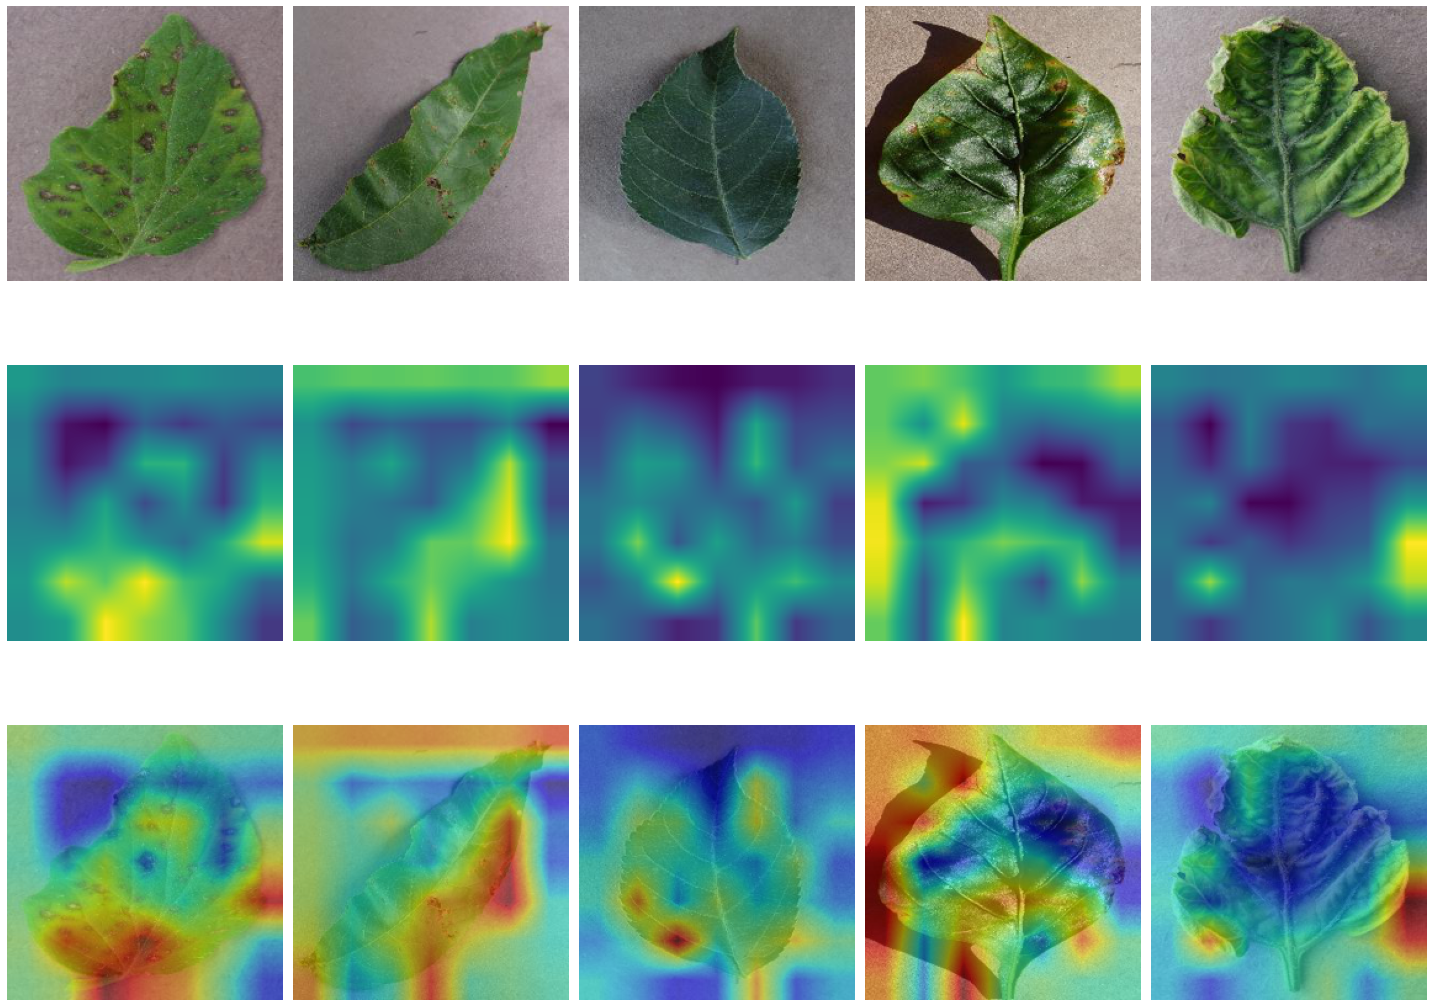

In [ ]:
#CAM
fig, axes = plt.subplots(3, 5, figsize=(20, 16))

for i, s in enumerate(samples):
    img_set = s['target']
    img_path = s['img_path']
    class_idx = s['class_idx']
    img, cam, predictions = generate_cam(model, img_path, class_idx)
    pred_values = np.squeeze(predictions, 0)
    #top1 = np.argmax(pred_values)
    top1_value = round(float(pred_values[top1]), 3)
    props = generate_bbox(img, cam, 0.2)
    
    axes[0, i].imshow(img)
    axes[1, i].imshow(cam)
    axes[2, i].imshow(img)
    axes[2, i].imshow(cam, cmap='jet', alpha=0.5)
    
   # axes[3, i].imshow(img)
    '''
    for b in props:
        bbox = b.bbox
        xs = bbox[1]
        ys = bbox[0]
        w = bbox[3] - bbox[1]
        h = bbox[2] - bbox[0]

        rect = patches.Rectangle((xs, ys), w, h, linewidth=2, edgecolor='r', facecolor='none')
        axes[3, i].add_patch(rect)
    '''
    axes[0,i].axis('off')
    axes[1,i].axis('off')
    axes[2,i].axis('off')
  #  axes[3,i].axis('off')
    
    #axes[0, i].set_title("pred: {} - {}".format(class_indices[top1], top1_value), fontsize=15)
    
plt.tight_layout()
plt.show()

원본 이미지에서 잎의 줄기 부분과 질병에 해당하는 부분에 집중되어 있음을 볼 수 있다.
**따라서 시각화를 통해 봤을 때 모델은 잎의 줄기 부분을 통해 해당 이미지가 어떤 작물의 잎인지 판단하고 질병에 걸린 부분을 통해 어떤 질병에 해당하는지 분류한다.**

## 디버깅 경험

In [ ]:
x = conv_base.output
output = layers.Dense(33, activation='softmax')(x)
model = Model(input_tensor, output)

#optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy',optimizer=optimizers.adam(),metrics=['accuracy'])

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-5)
MODEL_SAVE_FOLDER_PATH='/content/gdrive/My Drive/'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}_halfFreeze2_lrEdit.hdf5'
checkpoint= ModelCheckpoint(filepath=model_path,monitor='val_acc',verbose=1, save_best_only=True)
earlystop=EarlyStopping(patience=15)
my_callbacks = [checkpoint, annealer]

In [ ]:
# Fits the model on batches with real-time data augmentation
resnet = model.fit_generator(train_generator, steps_per_epoch=500,
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=my_callbacks)

Epoch 1/50
500/500 [==============================] - 167s 333ms/step - loss: 0.5354 - accuracy: 0.8663 - val_loss: 6.9757 - val_accuracy: 0.2894
Epoch 2/50
  1/500 [..............................] - ETA: 1:06 - loss: 0.9607 - accuracy: 0.7188

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


500/500 [==============================] - 163s 326ms/step - loss: 0.8395 - accuracy: 0.7897 - val_loss: 1.2042 - val_accuracy: 0.7451
Epoch 3/50
500/500 [==============================] - 163s 325ms/step - loss: 0.4118 - accuracy: 0.8865 - val_loss: 203.9712 - val_accuracy: 0.3843
Epoch 4/50
500/500 [==============================] - 163s 325ms/step - loss: 0.3328 - accuracy: 0.9003 - val_loss: 1.3446 - val_accuracy: 0.8639
Epoch 5/50
500/500 [==============================] - 162s 324ms/step - loss: 0.2926 - accuracy: 0.9208 - val_loss: 0.3544 - val_accuracy: 0.8305
Epoch 6/50
500/500 [==============================] - 163s 326ms/step - loss: 0.2182 - accuracy: 0.9328 - val_loss: 0.7201 - val_accuracy: 0.8294
Epoch 7/50
500/500 [==============================] - 165s 330ms/step - loss: 0.2403 - accuracy: 0.9291 - val_loss: 0.7172 - val_accuracy: 0.8757
Epoch 8/50
500/500 [==============================] - 161s 323ms/step - loss: 1.3721 - accuracy: 0.7150 - val_loss: 360.0924 - val_ac

첫번째 에폭 에러 발생, 모델 저장X

-> 모델 구성 시 accuracy로 명시하였으면 체크포인트 부분 val_acc를 val_accuracy로 해줘야 함



## Github 링크

https://github.com/Annie-Yeeun-Jang/Plant_disease_classification

## 기여도 평가

장예은: 100%
- augmentation 아이디어 제안
- 데이터 전처리
- baseline 구축
- Resnet 구축, 실행
- CAM 시각화

이예빈: 100%
- augmentation 아이디어 제안
- 데이터 전처리
- DenseNet구축
- Baseline, DenseNet 모델 컴파일, 디버깅
- 성능평가 매트릭스 그리기
- FN score 성능평가 해석
- 발표

조나단: 90%
- 아이디어 제안
- augmentation 의견 제시
- pre_trained model선정 및 baseline 수정
- 성능측정(Confusion matrix, f1 score비교분석)

이유진: 30%
- 주제 논의 아이디어